# Minor project 
## Submitted by:
## Paras
### https://github.com/paras3849

### Objective : 
#### To understand how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).

### Problem Statement:
#### gender                                     : Gender of the student

#### race/ethnicity                         : Race of the Student As Group A/B/C

#### parental level of education  : What is the education Qualification of Students Parent

#### lunch                                        : Whether the lunch is Standard type/Free lunch or Some discounted lunch

#### test preparation course        : Whether Student has Taken or not and Completed

#### math score                              : Scores in Maths

#### reading score                          : Scores in Reading

#### writing score                           : Scores in Writing

### Objective of this Analysis:
#### To understand how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).

### What to do in  Exploratory Data Analysis:

##### To Analyse insights in the dataset.
##### To understand the connection between the variables and to uncover the underlying structure
##### To extract the import Variables
##### To detect anomalies
##### To test the underlying assumptions.
##### Provide Insights with Suitable Graphs and Visualizations.
##### Write all your inferences with supporting Analysis and Visualizations.

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis

#import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

###Importing Warnings
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.reset_option('^display.', silent=True)

In [2]:
student_data = pd.read_csv("D:\Project Ekeeda\StudentsPerformance.csv")
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
student_data.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
88,female,group A,some college,standard,none,58,70,67
977,male,group C,associate's degree,standard,none,62,65,58
837,female,group A,high school,standard,completed,75,82,79
294,male,group D,high school,free/reduced,completed,78,77,80
56,female,group E,associate's degree,standard,completed,82,85,86
36,female,group D,associate's degree,standard,none,74,81,83
355,female,group B,bachelor's degree,standard,none,61,72,70
618,male,group D,master's degree,standard,none,95,81,84
179,female,group D,some high school,standard,completed,97,100,100
359,female,group D,some college,standard,none,80,90,89


In [5]:
student_data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
student_data.shape

(1000, 8)

In [7]:
student_data.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [8]:
student_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
student_data.duplicated().sum()

0

In [10]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
student_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [12]:
student_data.rename(columns={
    "gender": "gender",
    "race/ethnicity": "ethnicity",
    "parental level of education": "education",
    "lunch": "lunch",
    "test preparation course": "preparation_test",
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"
},inplace=True)

In [13]:
student_data.head()

,gender,ethnicity,education,lunch,preparation_test,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
student_data.nunique()

gender               2
ethnicity            5
education            6
lunch                2
preparation_test     2
math_score          81
reading_score       72
writing_score       77
dtype: int64

In [15]:
student_data['ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [16]:
student_data.dtypes

gender              object
ethnicity           object
education           object
lunch               object
preparation_test    object
math_score           int64
reading_score        int64
writing_score        int64
dtype: object

In [17]:
student_data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
student_data.describe(include=[object])

,gender,ethnicity,education,lunch,preparation_test
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [19]:
print("Categories in 'gender' variable:     ",end=" " )
print(student_data['gender'].unique())

print("Categories in 'ethnicity' variable:  ",end=" ")
print(student_data['ethnicity'].unique())

print("Categories in'education' variable:",end=" " )
print(student_data['education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(student_data['lunch'].unique())

print("Categories in 'preparation test' variable:     ",end=" " )
print(student_data['preparation_test'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'preparation test' variable:      ['none' 'completed']


In [20]:
# define numerical & categorical columns
numeric_features = [feature for feature in student_data.columns if student_data[feature].dtype != 'O']
categorical_features = [feature for feature in student_data.columns if student_data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'ethnicity', 'education', 'lunch', 'preparation_test']


# Visualization

## Boxplot

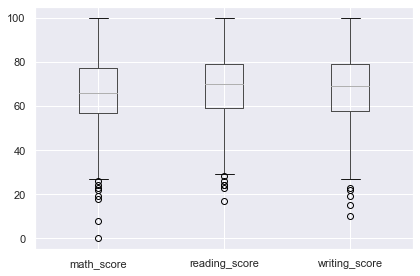

In [21]:
student_data.boxplot()
plt.tight_layout()

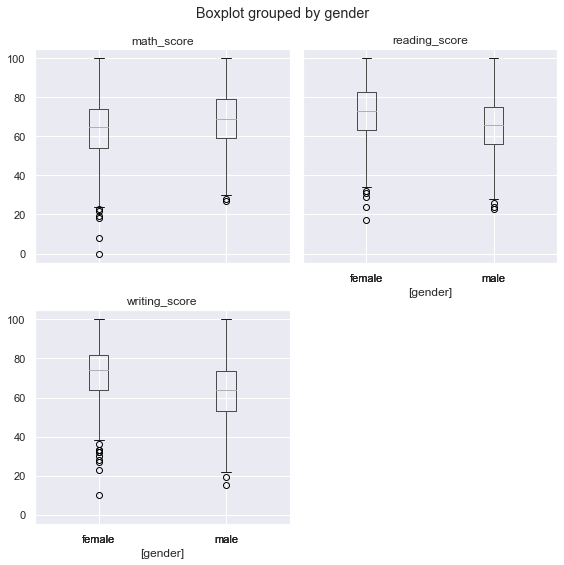

In [22]:
student_data.boxplot(by="gender", figsize=(8,8))
plt.tight_layout()

## Heatmap

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


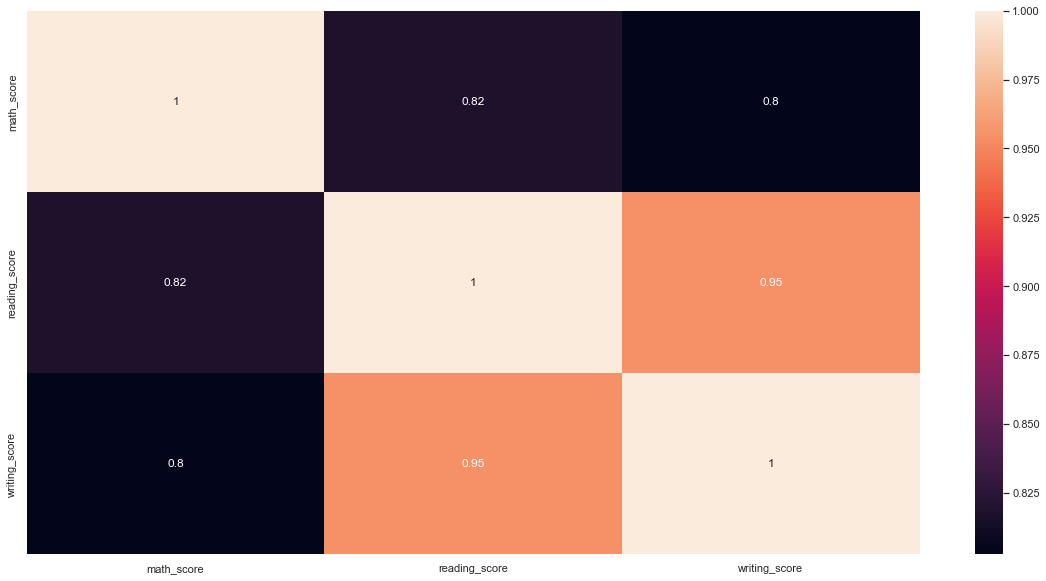

In [23]:
# finding the relations between the variables with heatmap
plt.figure(figsize=(20,10))
c= student_data.corr()
sns.heatmap(c,annot=True)
c

We can see that students’ exam scores are very much similer for the diffrent courses. Math has the lowest mean. Reading and writing have a strong postive correlation

## Bar Plot

In [24]:
student_data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

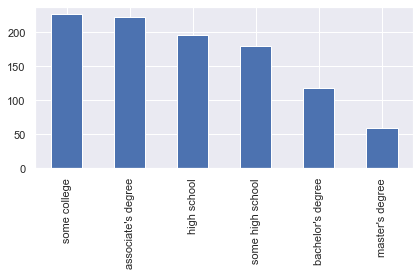

In [25]:
student_data['education'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

## Pie Chart

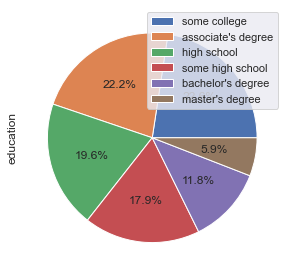

In [26]:
student_data['education'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

## Line Plot

Text(0.5, 1.0, 'Writing Score')

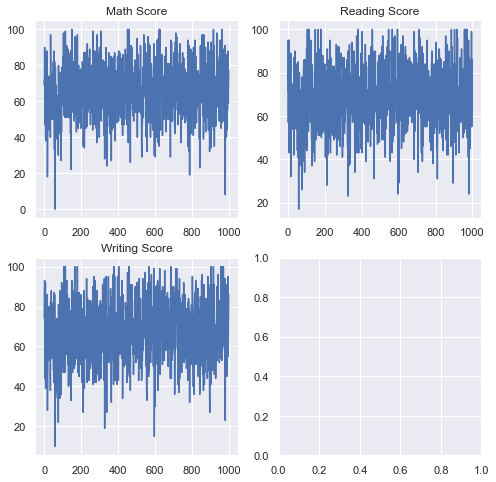

In [27]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

student_data['math_score'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Math Score')

student_data['reading_score'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Reading Score')

student_data['writing_score'].plot.line(ax=ax[1][0])
ax[1][0].set_title('Writing Score')

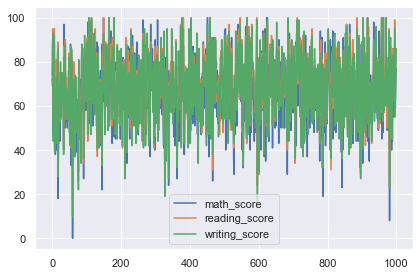

In [28]:
student_data.plot()
plt.tight_layout()

## Histogram

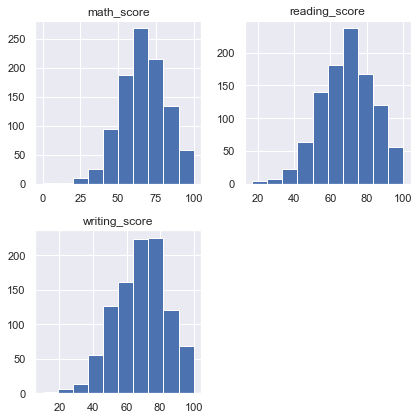

In [29]:
student_data.hist(figsize=(6,6), bins=10)
plt.tight_layout()

## Scatter Plot

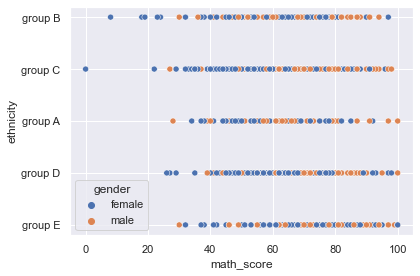

In [30]:
sns.scatterplot(x='math_score', y='ethnicity', data=student_data, hue='gender')
plt.tight_layout()

## Pair Plot

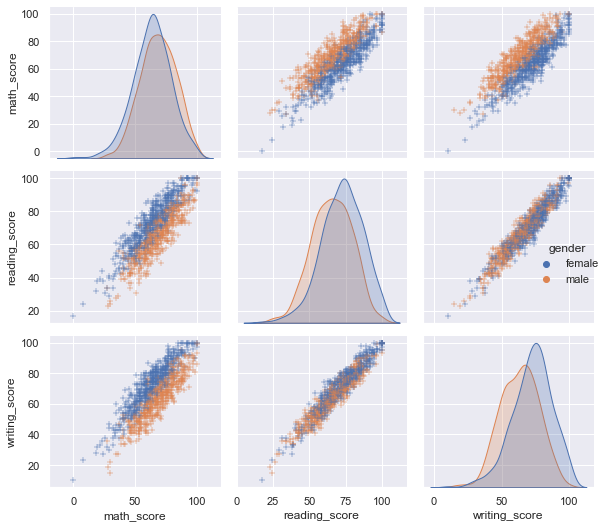

In [31]:
sns.pairplot(student_data, hue='gender', markers='+')
plt.tight_layout()

## Violin Plot

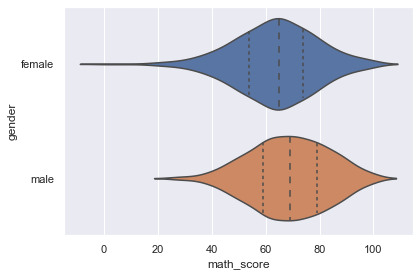

In [32]:
sns.violinplot(data=student_data, y='gender', x='math_score', inner='quartile')
plt.tight_layout()

### Compare students’ exam scores in different variables (math, reading, writing)

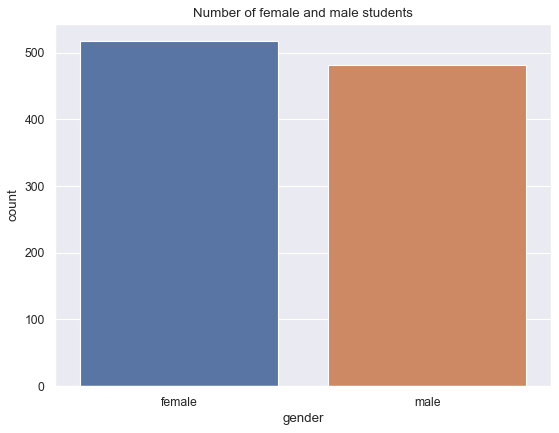

In [33]:
plt.figure(figsize=(8,6),dpi=80)
sns.countplot(data=student_data,x='gender',palette='deep')
plt.title('Number of female and male students');

Female students are more in number than male students.



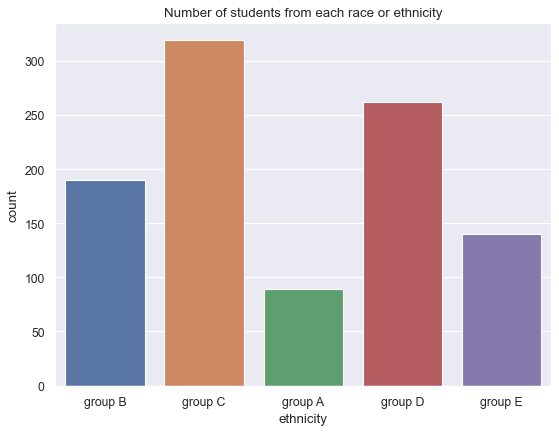

In [34]:
plt.figure(figsize=(8,6),dpi=80)
sns.countplot(data=student_data,x='ethnicity',palette='deep')
plt.title('Number of students from each race or ethnicity');

Students that belong to group C are highest, whereas group A is the lowest.

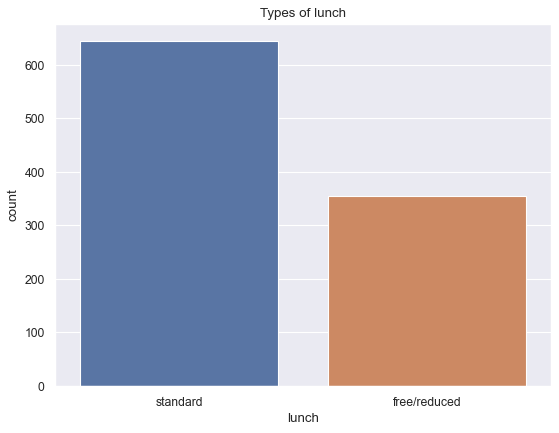

In [35]:
plt.figure(figsize=(8,6),dpi=80)
sns.countplot(data=student_data,x='lunch',palette='deep')
plt.title('Types of lunch');

Students who got standard lunch are more than students who got free/reduced lunch.

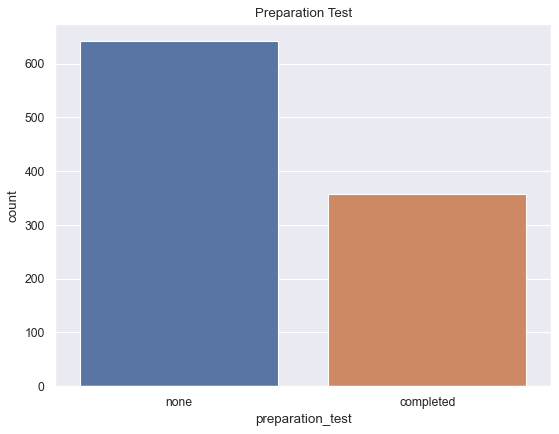

In [36]:
plt.figure(figsize=(8,6),dpi=80)
sns.countplot(data=student_data,x='preparation_test',palette='deep')
plt.title('Preparation Test');

Students that took test preparation course are less than students who didn't.

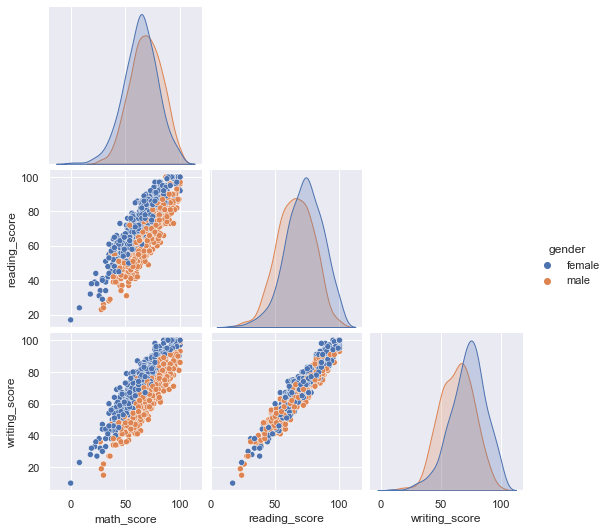

In [37]:
# understanding the relation between scores for each gender
sns.pairplot(student_data[['math_score','reading_score','writing_score','gender']],hue='gender',corner=True,palette='deep');

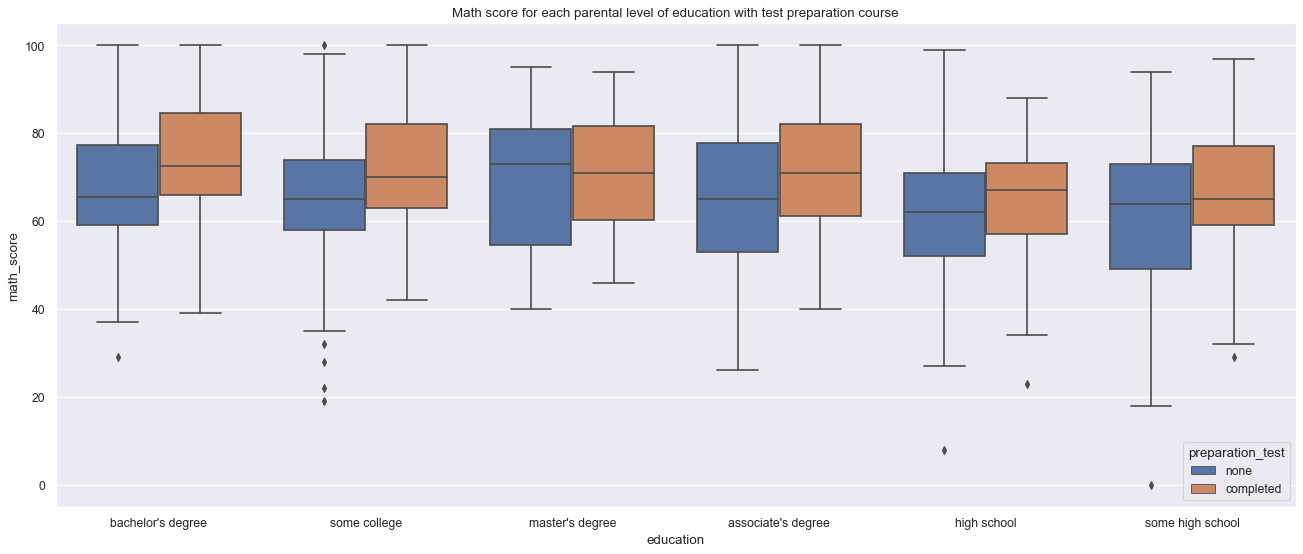

In [38]:
plt.figure(figsize=(20,8),dpi=80)
sns.boxplot(data=student_data,x='education',y='math_score',hue = 'preparation_test',palette='deep')
plt.title('Math score for each parental level of education with test preparation course');

Median math score of students who's parents have master's degree and did no test preparation course has highest median value.

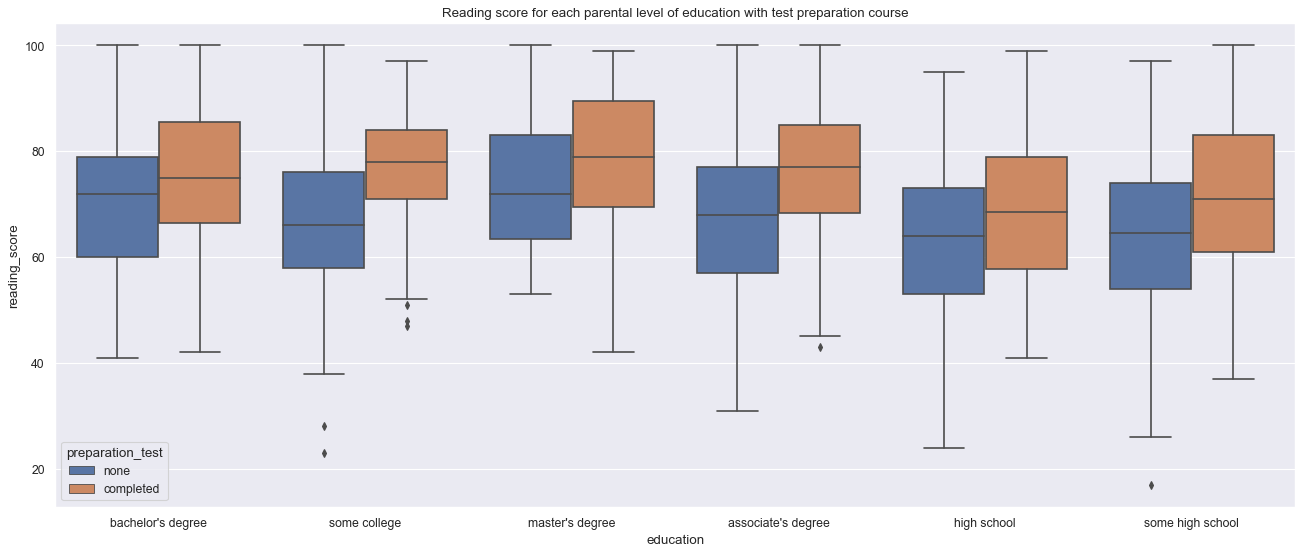

In [39]:
plt.figure(figsize=(20,8),dpi=80)
sns.boxplot(data=student_data,x='education',y='reading_score',hue = 'preparation_test',palette='deep')
plt.title('Reading score for each parental level of education with test preparation course');

Median reading score of students who's parents have master's degree and did test preparation course has highest median value.

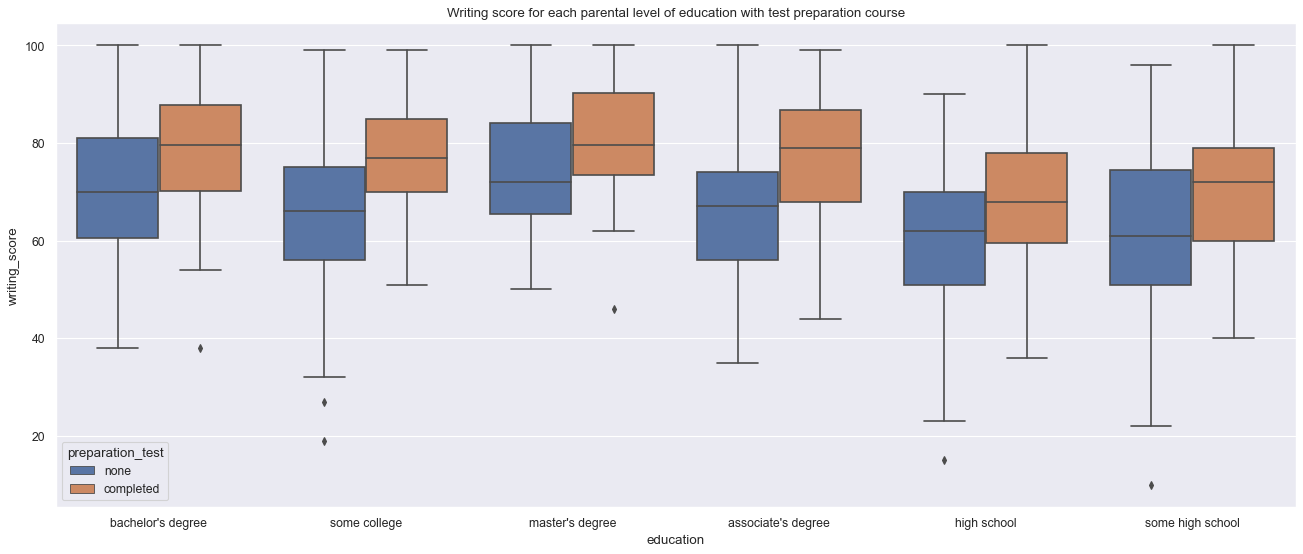

In [40]:
plt.figure(figsize=(20,8),dpi=80)
sns.boxplot(data=student_data,x='education',y='writing_score',hue = 'preparation_test',palette='deep')
plt.title('Writing score for each parental level of education with test preparation course');

Median writing score of students who's parents have bachelor's degree and did test preparation course has highest median value.

## Who performed better in different subjects male or female students?


In [41]:
# male and female scores in different courses
student_data.groupby(['gender']).mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<AxesSubplot:xlabel='gender'>

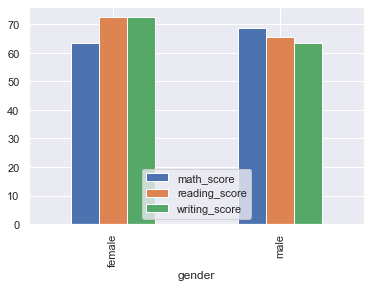

In [42]:
# plot male and female scores in different courses
student_data.groupby(['gender']).mean().plot(kind='bar')

We can see that on average, male have higher scores in math. Females have higher scores in reading and writing.





## Show any attributes (features) that are correlated with exam scores.

In [43]:
student_data.sample(5)

,gender,ethnicity,education,lunch,preparation_test,math_score,reading_score,writing_score
671,male,group D,associate's degree,free/reduced,none,52,57,50
724,male,group B,some college,standard,none,47,43,41
648,female,group B,high school,standard,none,50,53,55
217,female,group C,high school,free/reduced,none,34,42,39
859,male,group C,associate's degree,free/reduced,none,87,73,72


In [44]:
# correlation between parental_level_of_education and courses scores
student_data.groupby(['education']).mean()

,math_score,reading_score,writing_score
education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


<AxesSubplot:xlabel='education'>

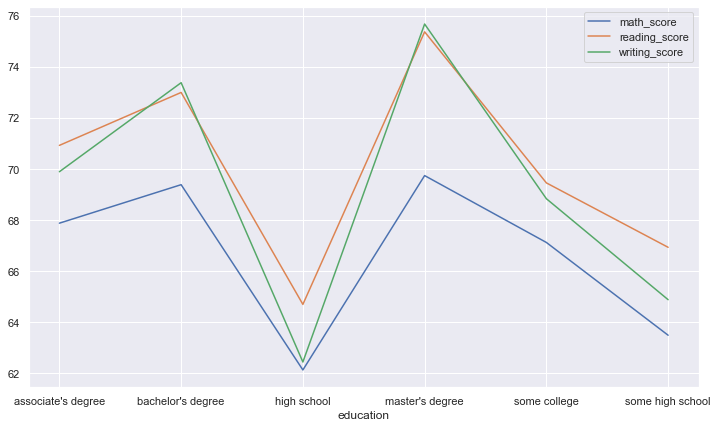

In [45]:
# plot correlation between parental_level_of_education and courses scores
student_data.groupby(['education']).mean().plot(figsize=(12,7))

We can see that the parental level of education is affecting their children exam
scores. When the parental have a higher education level, their childern have higher average exam scores.

## Does test preparation influence students’ performance?)

In [46]:
# correlation between test_preparation_course and courses scores
student_data.groupby(['preparation_test']).mean()

,math_score,reading_score,writing_score
preparation_test,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


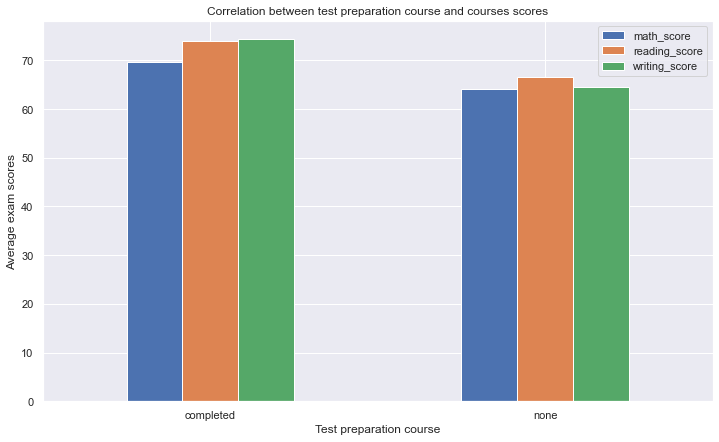

In [47]:
# plot correlation between test_preparation_course and courses scores
student_data.groupby(['preparation_test']).mean().plot(kind='bar', figsize=(12,7), rot=0)
plt.title('Correlation between test preparation course and courses scores')
plt.ylabel('Average exam scores')
plt.xlabel('Test preparation course');

We can see that the students who compeleted the test preparation course have a higher average exam scores.

In [48]:
student_data['ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

In [49]:
# correlation between race/ethnicity and courses scores
student_data.groupby(['ethnicity']).mean()

,math_score,reading_score,writing_score
ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


<AxesSubplot:xlabel='ethnicity'>

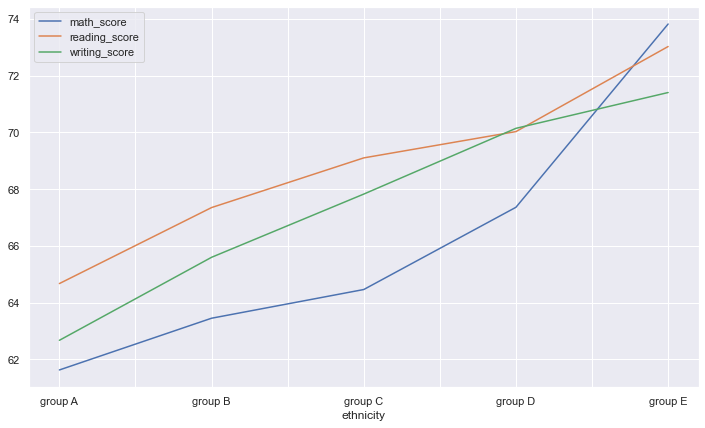

In [50]:
# plot correlation between race/ethnicity and courses scores
student_data.groupby(['ethnicity']).mean().plot(figsize=(12,7))

It's clear that the race/ethnicity have an effect on the exam scores. group A have the lowest average exam scores and group E have the highest average exam scores.

## What's the percentage of students per each type of ethnicity?

<AxesSubplot:title={'center':'percentage of students per ethnicity'}, ylabel='ethnicity'>

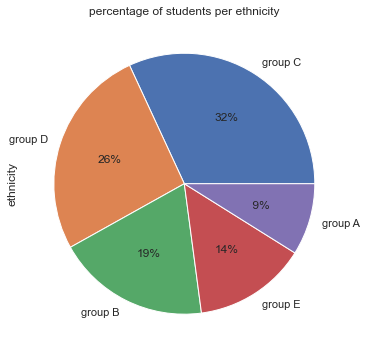

In [51]:
student_data["ethnicity"].value_counts(normalize=True,ascending=False).plot(kind="pie",autopct='%2.0f%%',
                                                                   title="percentage of students per ethnicity",
                                                                   figsize=(12,6))

In [52]:
student_data['total_score'] = student_data['math_score'] + student_data['reading_score'] + student_data['writing_score']
student_data['percentage'] = student_data['total_score']/3
student_data['result'] = np.where(student_data['total_score']<120, 'F', 'P')
student_data['performance'] = pd.cut(student_data.percentage,bins=[0,39,60,70,80,90,100],labels=['F','C','B','B+','A','A+'])
student_data.head()

,gender,ethnicity,education,lunch,preparation_test,math_score,reading_score,writing_score,total_score,percentage,result,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,P,B+
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,P,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,P,A+
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,P,C
4,male,group C,some college,standard,none,76,78,75,229,76.333333,P,B+


## How many percentage student passed in all subject based on gender?

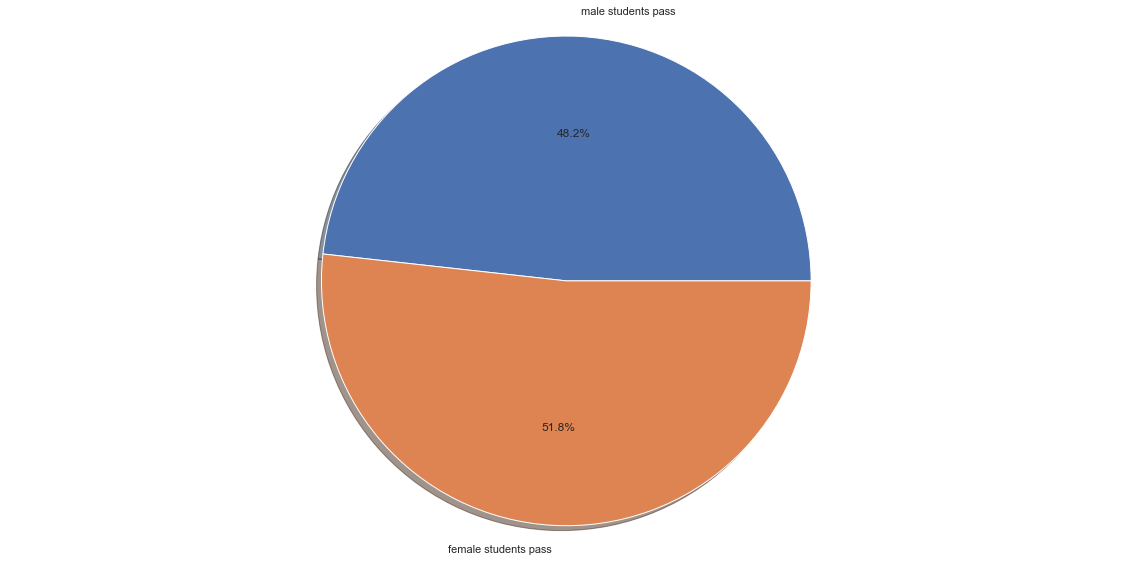

In [53]:
labels = ['male students pass','female students pass']
sizes = [student_data[student_data.result == 'P']['gender'].value_counts()[1],
         student_data[student_data.result == 'P']['gender'].value_counts()[0]]
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

Female students pass percentage is 4% higher than male students pass percentage

male students - 48.2%
female students - 51.8%

## How many percentage student passed based on ethnicity?

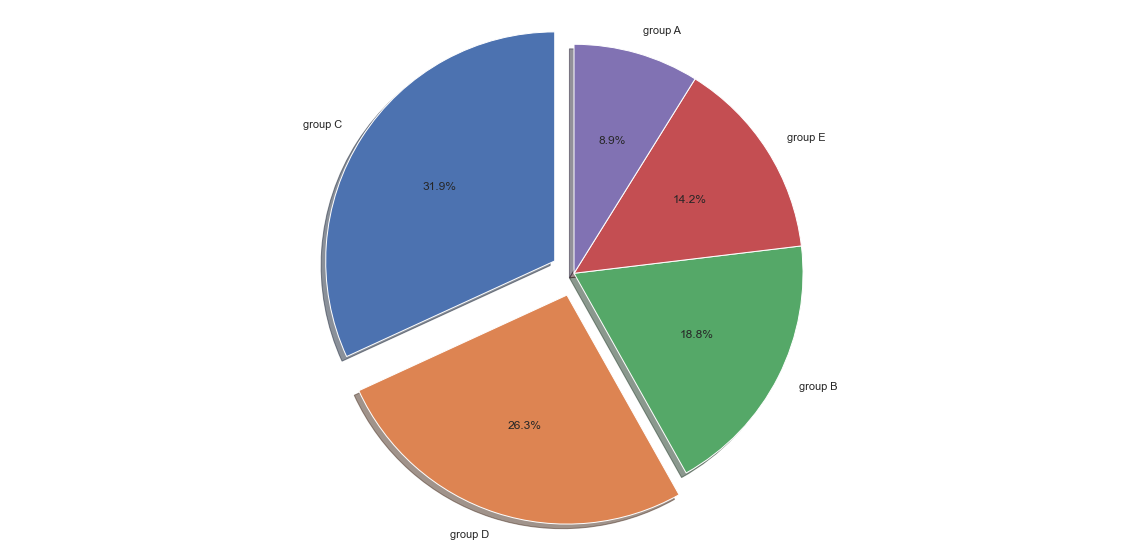

In [54]:
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(student_data[student_data.result == 'P']['ethnicity'].value_counts(),explode=(.1,.1,0,0,0),labels=['group C','group D','group B','group E','group A'],autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal')
plt.show()

So the students from group-C and group-D have good performance when compared to other groups

## How many student passed based on lunch?

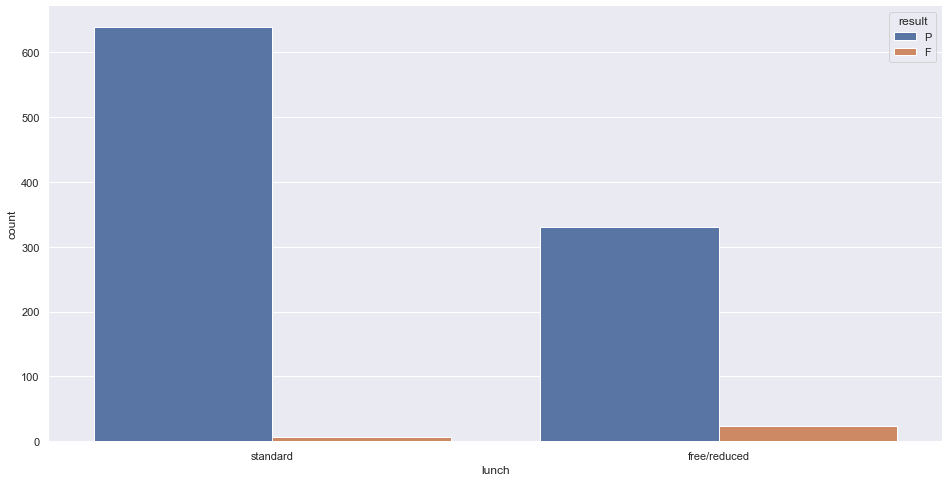

In [55]:
fig1, ax1 = plt.subplots(figsize=(16,8))
sns.countplot(student_data.lunch,hue=student_data.result,ax=ax1)
sns.despine(left=True,bottom=True)
sns.set_style({'ytick.left': False,'xtick.top': False})

So students with free or reduced lunch might not perform well in exams

## How many student passed based on prepration test?

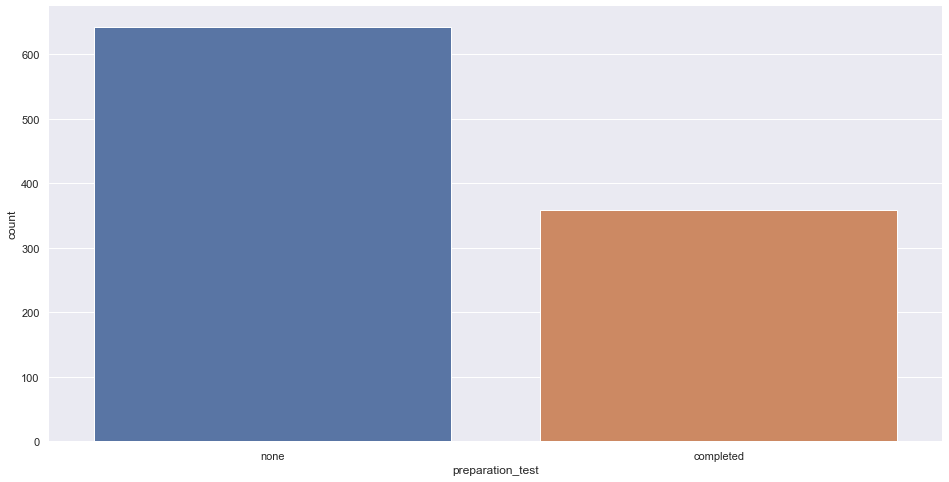

In [56]:
fig1, ax1 = plt.subplots(figsize=(16,8))
sns.countplot(student_data.preparation_test,ax=ax1)
sns.despine(left=True,bottom=True)
sns.set_style({'ytick.left': False,'xtick.top': False})

Text(0.5, 1.0, 'Test Preperation Completed')

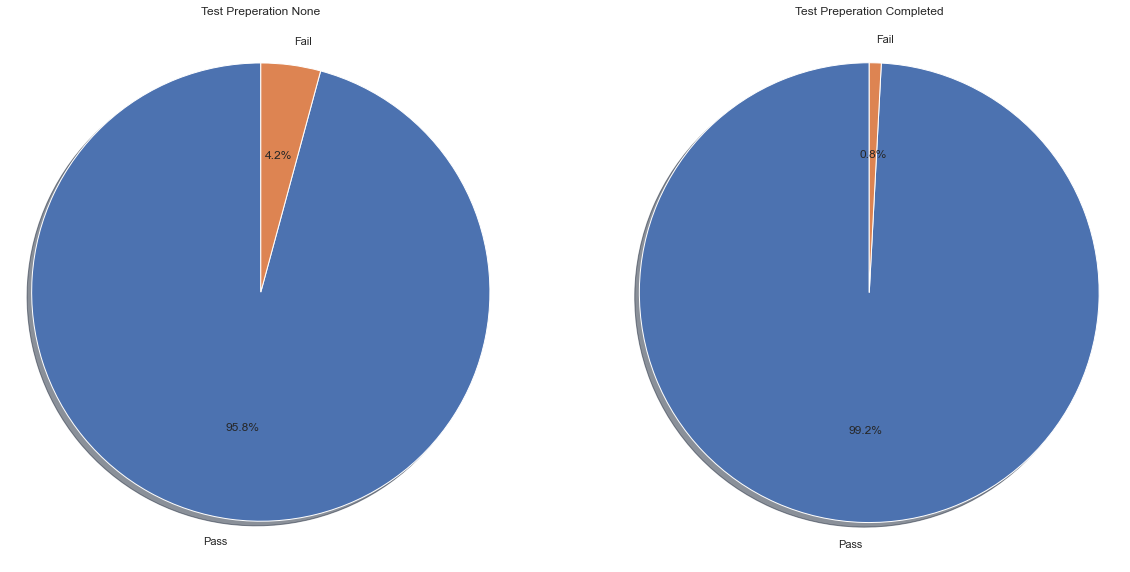

In [57]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.pie(student_data[student_data.preparation_test == 'none']['result'].value_counts(),labels=['Pass','Fail'],autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal')
ax1.set_title('Test Preperation None')
ax2.pie(student_data[student_data.preparation_test == 'completed']['result'].value_counts(),labels=['Pass','Fail'],autopct='%1.1f%%',shadow=True,startangle=90)
ax2.axis('equal')
ax2.set_title('Test Preperation Completed')


The students who completed the course have more pass percentage than students who didn't complete the course so test preparation course does have an impact on the student performance

## How many students have a master's degree and a total score above the average?

In [58]:
criteria = student_data[(student_data["total_score"] > np.mean(student_data["total_score"])) & (student_data["education"] == "master's degree")]
criteria
master = student_data.loc[criteria.index,["gender","education","total_score"]]
master.head()

,gender,education,total_score
2,female,master's degree,278
25,male,master's degree,219
29,female,master's degree,207
106,female,master's degree,287
128,male,master's degree,238


In [59]:
num_rows= criteria.shape[0]
print(f"the number of students with a master degree and a total score above average is:{num_rows}")

the number of students with a master degree and a total score above average is:39


## What's the percentage of male students with zero preparation and a total score below the average?

In [60]:
new_criteria=student_data[(student_data["gender"]=="male") & (student_data["preparation_test"] =="none") & (student_data["total_score"]< np.mean(student_data["total_score"]))]
new_criteria.head()

,gender,ethnicity,education,lunch,preparation_test,math_score,reading_score,writing_score,total_score,percentage,result,performance
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,P,C
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667,P,C
10,male,group C,associate's degree,standard,none,58,54,52,164,54.666667,P,C
11,male,group D,associate's degree,standard,none,40,52,43,135,45.000000,P,C
20,male,group D,high school,standard,none,66,69,63,198,66.000000,P,B


In [61]:
percentage = new_criteria.shape[0] /student_data["total_score"].shape[0]*100
print(f"the percentage of male students with zero preparation and total score below the mean is:{percentage}")

the percentage of male students with zero preparation and total score below the mean is:18.8


## What's the number of  female and male students with a master degree and a total score above the average?

In [62]:
criteria.groupby("gender")["total_score"].count()
 

gender
female    21
male      18
Name: total_score, dtype: int64

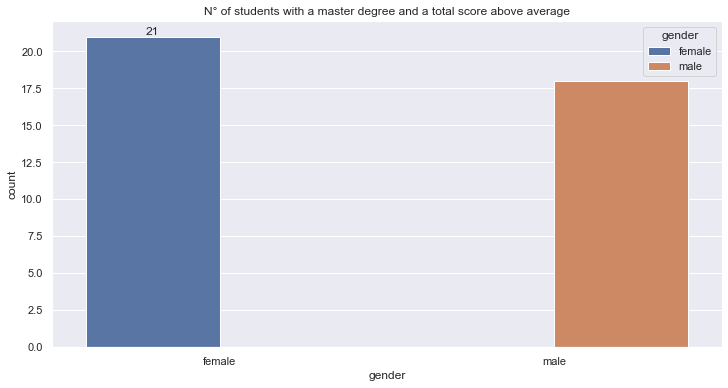

In [63]:
plt.figure(figsize=(12,6))
above_average = sns.countplot(data= criteria, x="gender",hue="gender")
above_average.set(title="N° of students with a master degree and a total score above average")
above_average.bar_label(above_average.containers[0])
sns.set_palette("deep")
sns.set_style("darkgrid")
plt.show()

## what's the percentage of students per type of education?

In [64]:
edu_dist = student_data["education"].value_counts(normalize=True,ascending=False)
edu_dist

some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: education, dtype: float64

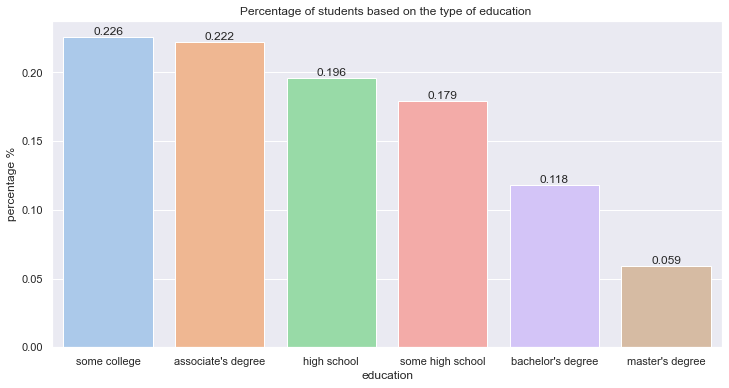

In [65]:
plt.figure(figsize=(12,6))
dist=sns.barplot(x=edu_dist.index, y=edu_dist.values,palette = "pastel")
dist.set(title="Percentage of students based on the type of education ",ylabel="percentage %",xlabel="education")
dist.bar_label(dist.containers[0])
plt.show()

## Distribution of the total score based on gender in percentage (%)

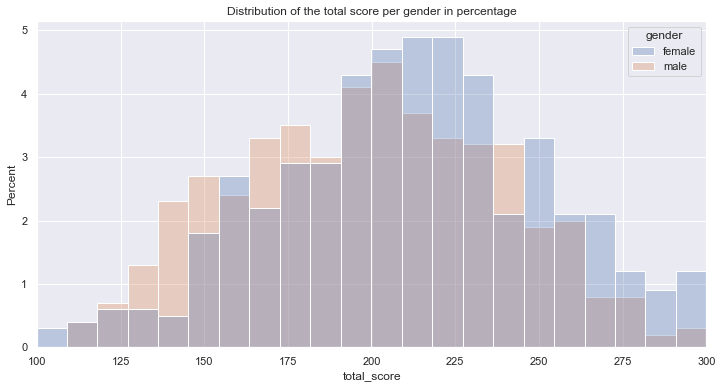

In [66]:
plt.figure(figsize=(12,6))
ax=sns.histplot(student_data,x="total_score",bins=30,stat="percent",hue="gender",alpha=0.3)
ax.set(title="Distribution of the total score per gender in percentage",xlim=(100,300))
plt.show()

## Average total score of students with completed and none preparetion broken down into education and gender 

In [67]:
student_data.pivot_table(index=["education","gender"],columns="preparation_test",values="total_score",aggfunc=np.mean)

preparation_test            completed        none
education          gender                        
associate's degree female  231.500000  203.081081
                   male    217.800000  195.000000
bachelor's degree  female  234.681818  218.292683
                   male    223.250000  193.225806
high school        female  205.517241  189.215385
                   male    195.925926  180.693333
master's degree    female  233.928571  212.681818
                   male    217.333333  221.705882
some college       female  225.690476  206.000000
                   male    221.885714  185.287671
some high school   female  214.257143  185.714286
                   male    202.809524  185.782609

## What's the average total score per education?

In [68]:
edu_score= student_data.groupby("education")["total_score"].mean()
edu_score

education
associate's degree    208.707207
bachelor's degree     215.771186
high school           189.290816
master's degree       220.796610
some college          205.429204
some high school      195.324022
Name: total_score, dtype: float64

[Text(0, 0, '208.707'),
 Text(0, 0, '215.771'),
 Text(0, 0, '189.291'),
 Text(0, 0, '220.797'),
 Text(0, 0, '205.429'),
 Text(0, 0, '195.324')]

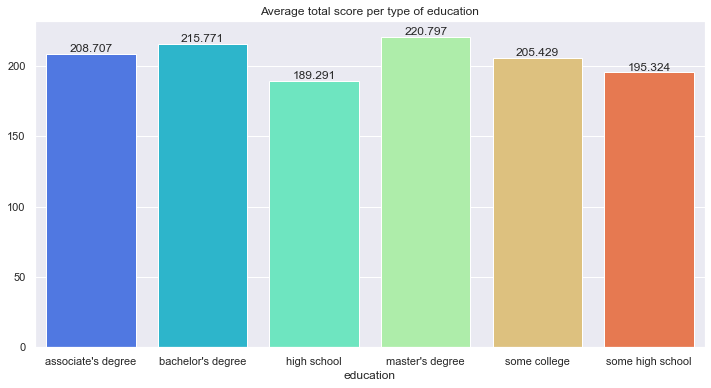

In [69]:
plt.figure(figsize=(12,6))
edu=sns.barplot(x=edu_score.index, y=edu_score.values,palette = "rainbow")
edu.set(title="Average total score per type of education")
edu.bar_label(edu.containers[0])


In [70]:
above_mean = student_data[student_data["total_score"]> np.mean(student_data["total_score"])]
student_data.loc[above_mean.index,:]

,gender,ethnicity,education,lunch,preparation_test,math_score,reading_score,writing_score,total_score,percentage,result,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,P,B+
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,P,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,P,A+
4,male,group C,some college,standard,none,76,78,75,229,76.333333,P,B+
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333,P,B+
...,...,...,...,...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76,207,69.000000,P,B
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,208,69.333333,P,B
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,P,A+
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,P,B+


## What's the percentage of male and female students for each type of education?

In [71]:
edu_sex = above_mean.groupby("education")["gender"].value_counts(normalize=True,ascending=False)
edu_sex

education           gender
associate's degree  female    0.554688
                    male      0.445312
bachelor's degree   female    0.616438
                    male      0.383562
high school         female    0.506329
                    male      0.493671
master's degree     female    0.538462
                    male      0.461538
some college        female    0.614754
                    male      0.385246
some high school    female    0.564706
                    male      0.435294
Name: gender, dtype: float64

## What's the average total score per type of education broken down into gender?

<Figure size 1080x576 with 0 Axes>

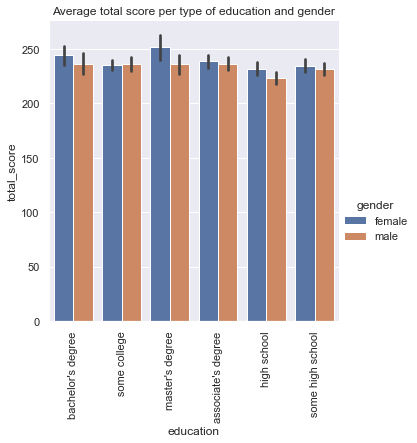

In [72]:
plt.figure(figsize=(15,8))
above_average_edu_sex = sns.catplot(kind="bar",data=above_mean, x="education",y="total_score",hue="gender")
above_average_edu_sex.set(title="Average total score per type of education and gender")
plt.xticks(rotation=90)
sns.set_palette("dark")
sns.set_style("darkgrid")
plt.show()

## Correlation between total score and the other tests

In [73]:
student_data.corr()["total_score"] # let's check the correaltion of total score with the other numerical columns of the dataset

math_score       0.918746
reading_score    0.970331
writing_score    0.965667
total_score      1.000000
percentage       1.000000
Name: total_score, dtype: float64

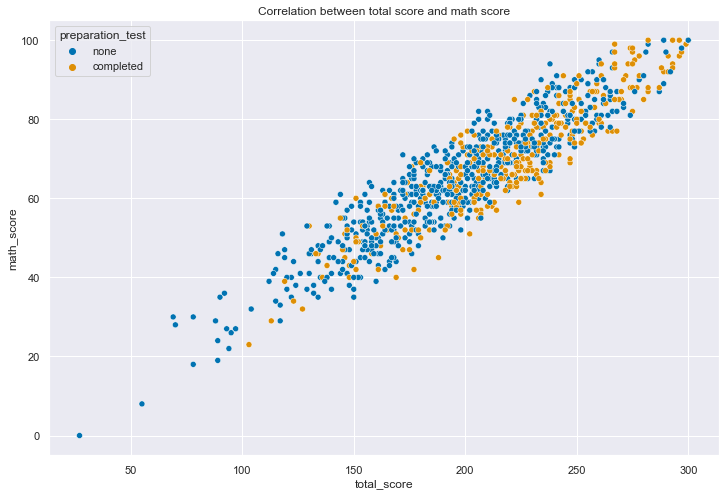

In [74]:
plt.figure(figsize=(12,8))
tot_score_corr=sns.scatterplot(data=student_data,x="total_score",y="math_score",hue="preparation_test",palette="colorblind")
tot_score_corr.set(title="Correlation between total score and math score")
plt.show()

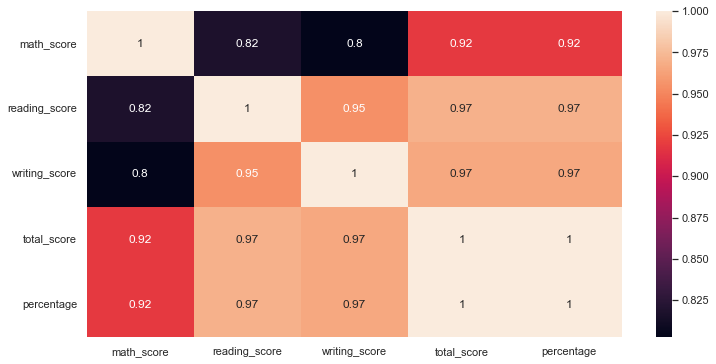

In [75]:
plt.figure(figsize=(12,6))
sns.heatmap(student_data.corr(),annot=True)
plt.show()


Histogram based on score

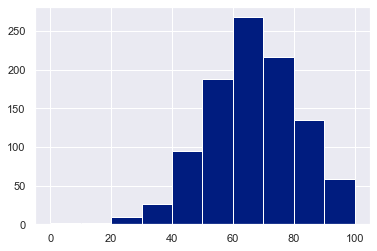

In [76]:
plt.hist(student_data['math_score'], bins=10)
plt.show()

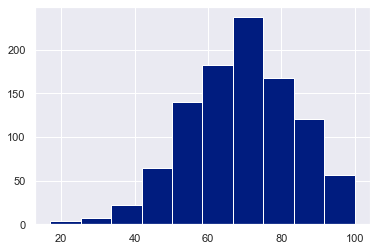

In [77]:
plt.hist(student_data['reading_score'], bins=10)
plt.show()

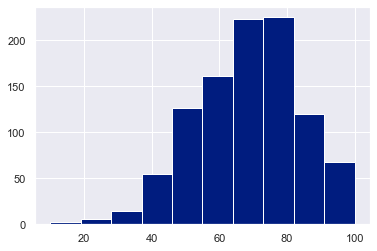

In [78]:
plt.hist(student_data['writing_score'], bins=10)
plt.show()

Maximum number of students have scored between 60 and 80 in all three subjects

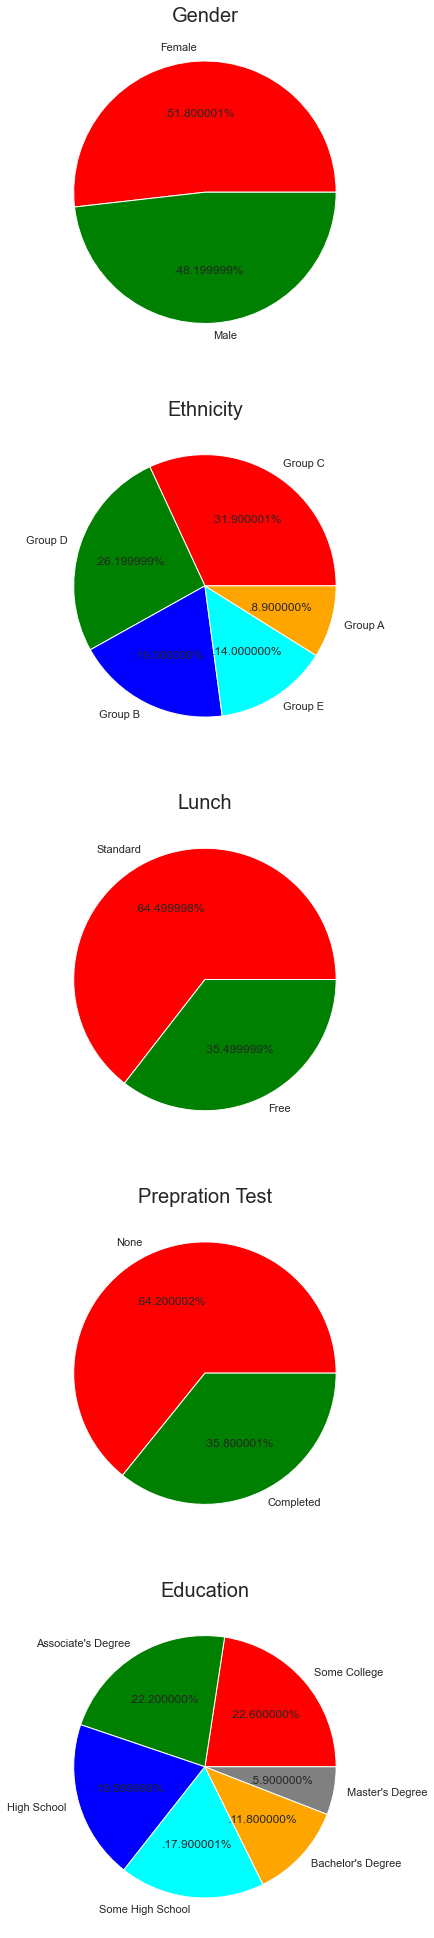

In [79]:
plt.rcParams['figure.figsize'] = (30, 35)

plt.subplot(5, 1, 1)
size = student_data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)




plt.subplot(5, 1, 2)
size = student_data['ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Ethnicity', fontsize = 20)



plt.subplot(5,1 , 3)
size = student_data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)



plt.subplot(5, 1, 4)
size = student_data['preparation_test'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Prepration Test', fontsize = 20)



plt.subplot(5, 1, 5)
size = student_data['education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Education', fontsize = 20)




plt.show()

## Observations

1:Number of Male and Female students is almost equal

2:Number students are greatest in Group C

3:Number of students who have standard lunch are greater

4:Number of students who have not enrolled in any test preparation course is greater

5:Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## Score based on gender

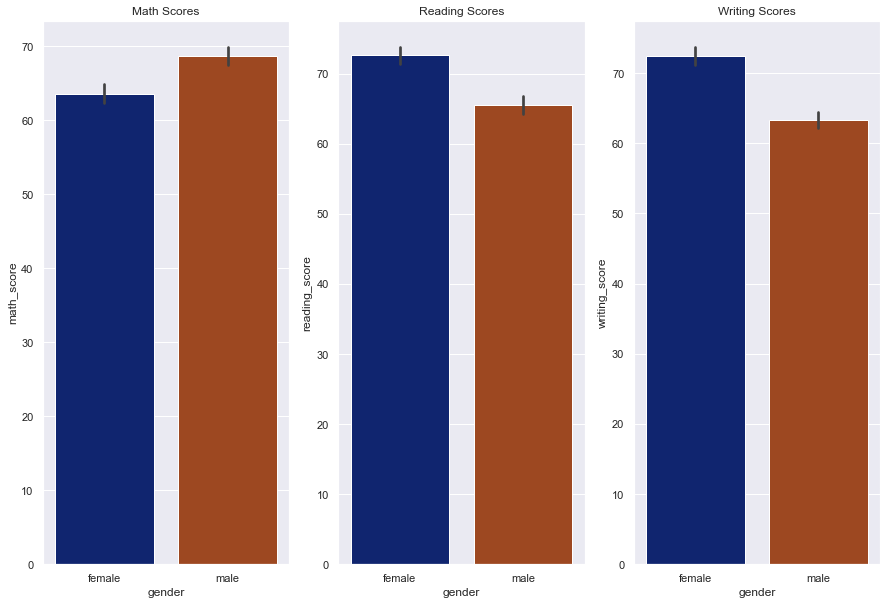

In [80]:
plt.figure(figsize=(15,10))
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="gender", y="math_score", data=student_data)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(x="gender", y="reading_score", data=student_data)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(x="gender", y="writing_score", data=student_data)
plt.show()

Male students have scored higher than female in math score subject, but female students have scored higher in reading, writing subject

## Student Performance

C     267
B     260
B+    253
A     144
A+     50
F      26
Name: performance, dtype: int64

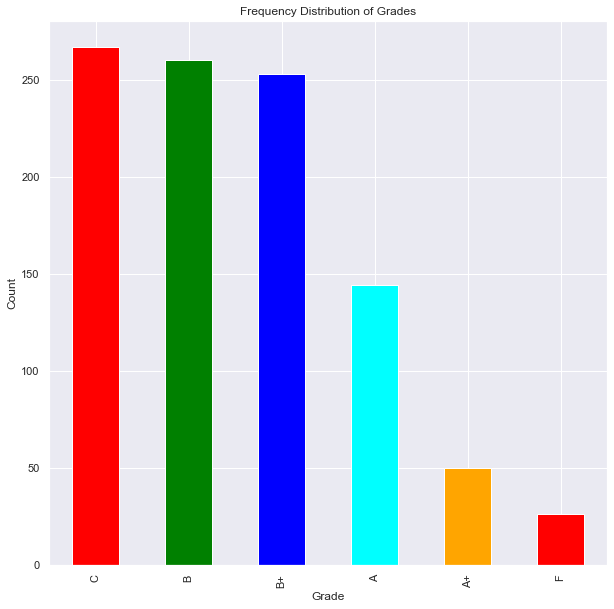

In [81]:
student_data['performance'].value_counts().plot.bar(title='Frequency Distribution of Grades',color=['red', 'green', 'blue', 'cyan','orange'],figsize=(10,10))
plt.xlabel('Grade')
plt.ylabel('Count')
student_data['performance'].value_counts()

Maximum number of students with grade"C"

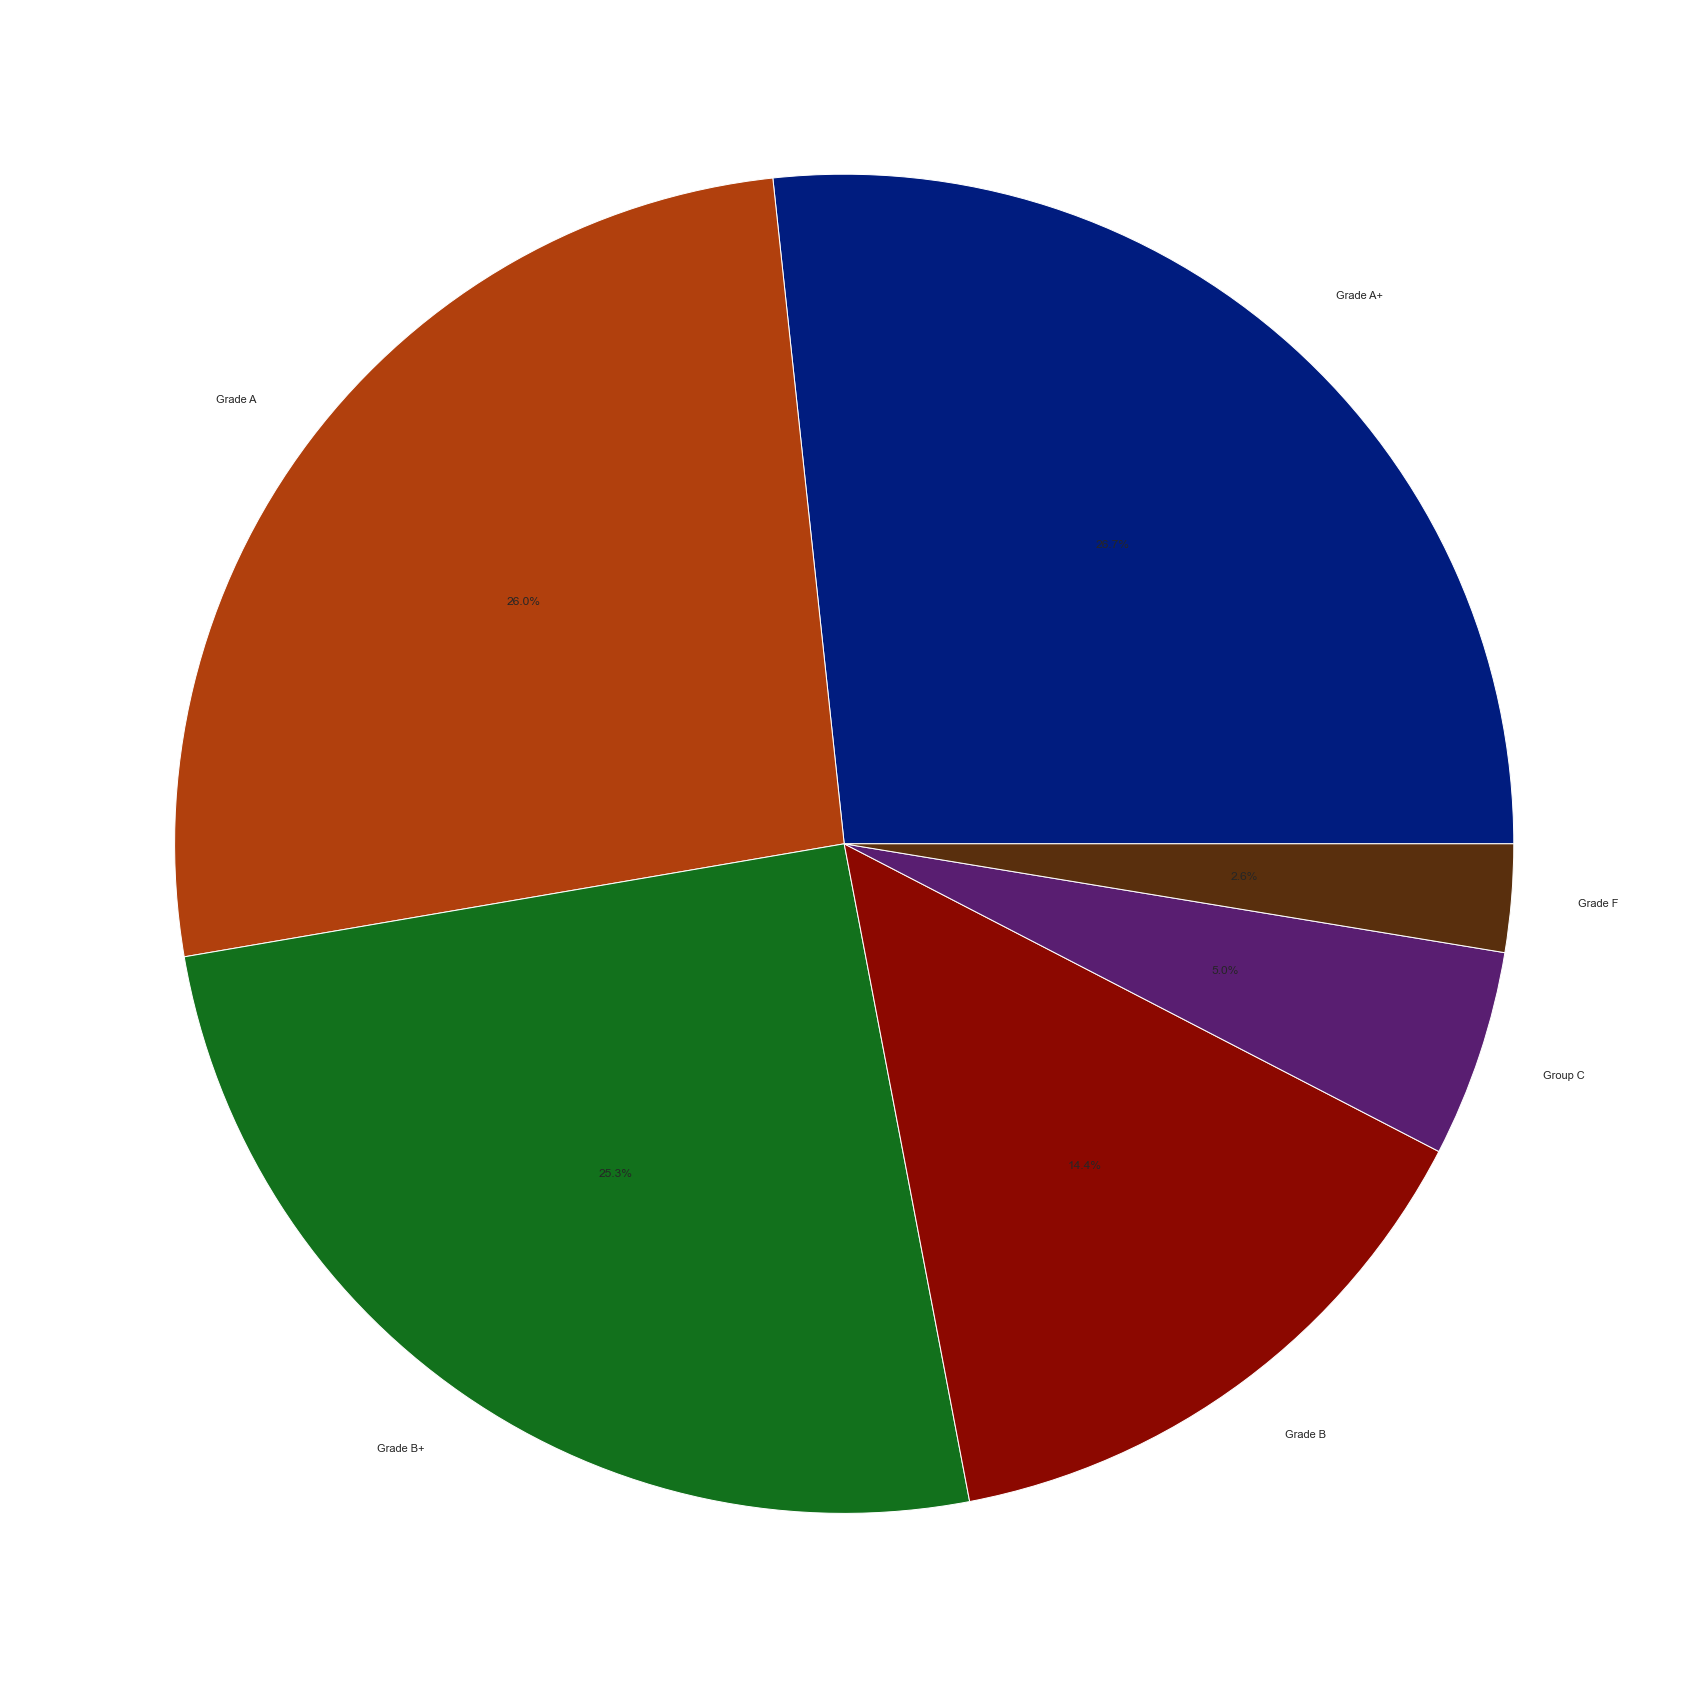

In [82]:
cnt=student_data['performance'].value_counts()
grades=['Grade A+','Grade A','Grade B+','Grade B','Group C','Grade F']
plt.pie(cnt,labels=grades,autopct='%1.1f%%')
plt.show()

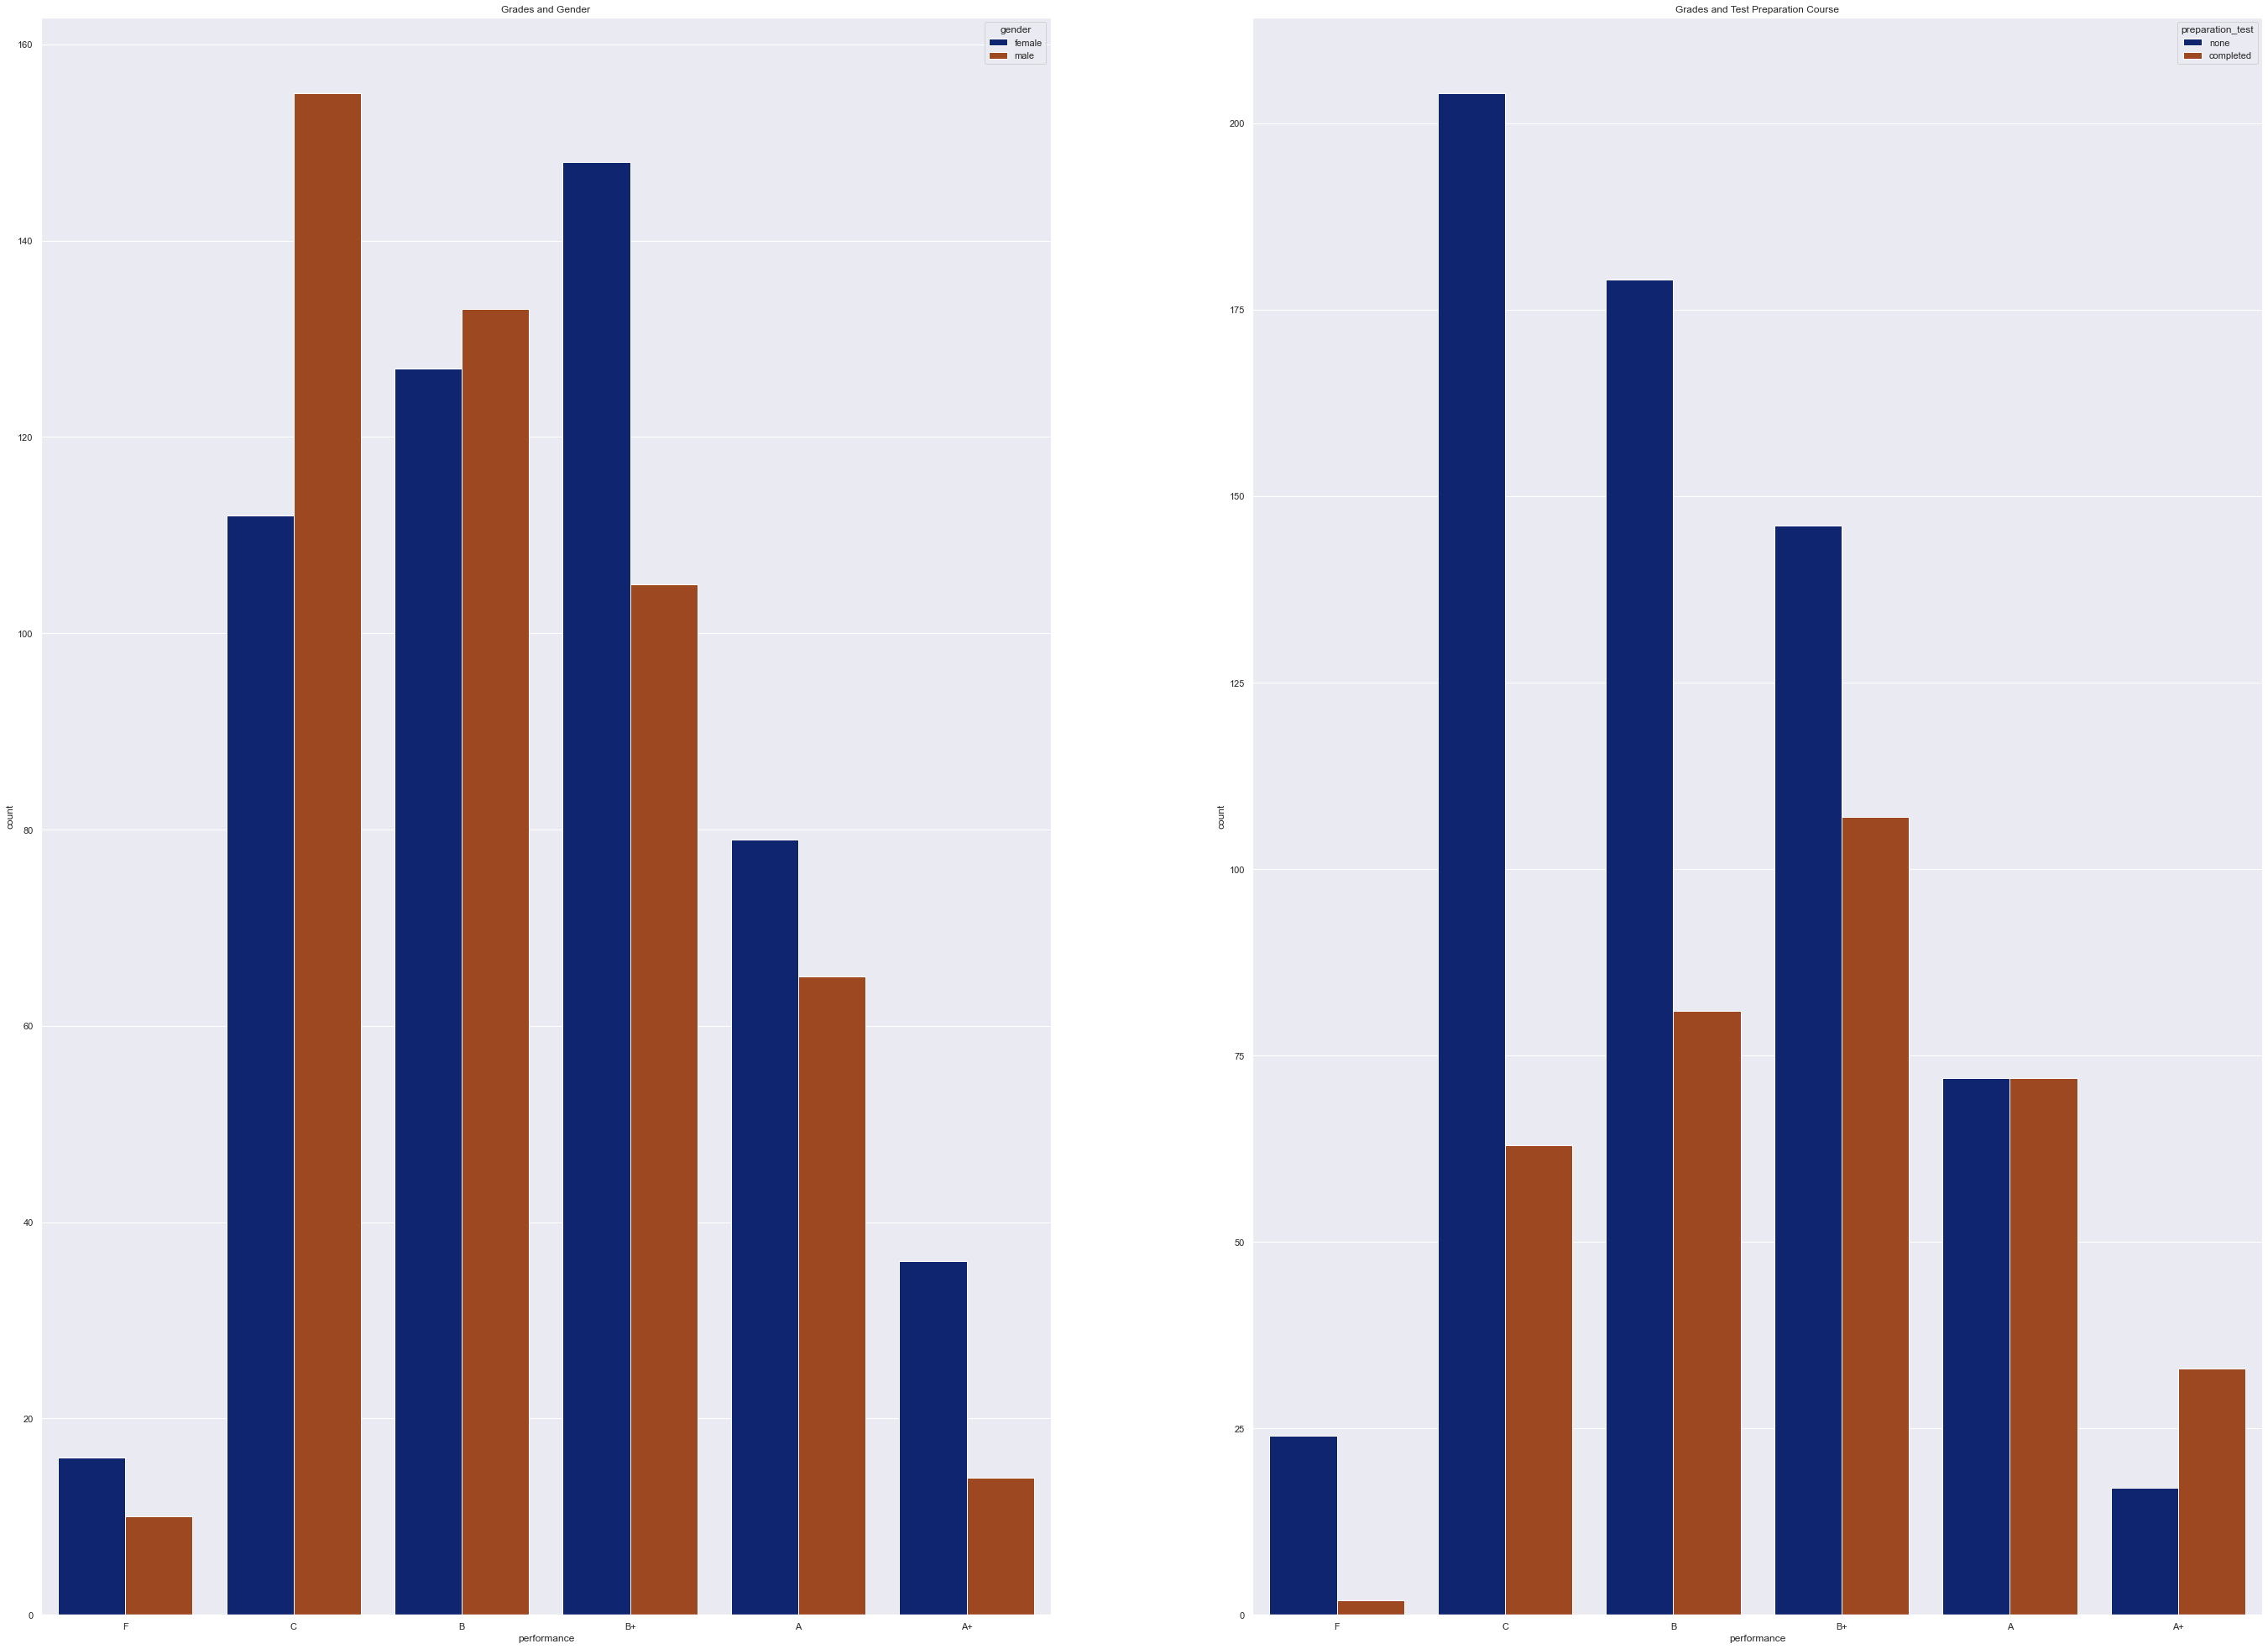

In [83]:
plt.subplots_adjust(right=1.35)
plt.subplot(121)
plt.title("Grades and Gender")
sns.countplot(x='performance',data=student_data,hue="gender")
plt.subplot(122)
plt.title("Grades and Test Preparation Course")
sns.countplot(x='performance',data=student_data,hue='preparation_test')
plt.show()

Grades as a performance metric:
    
    1. Female Students performed better than male students overall, scoring more A+, A and B grades.
    
    2. Students who completed test preparation course scored more A+ grades.
    
    3. Very few students (almost negligible) who completed test preparation course failed (F Grade).

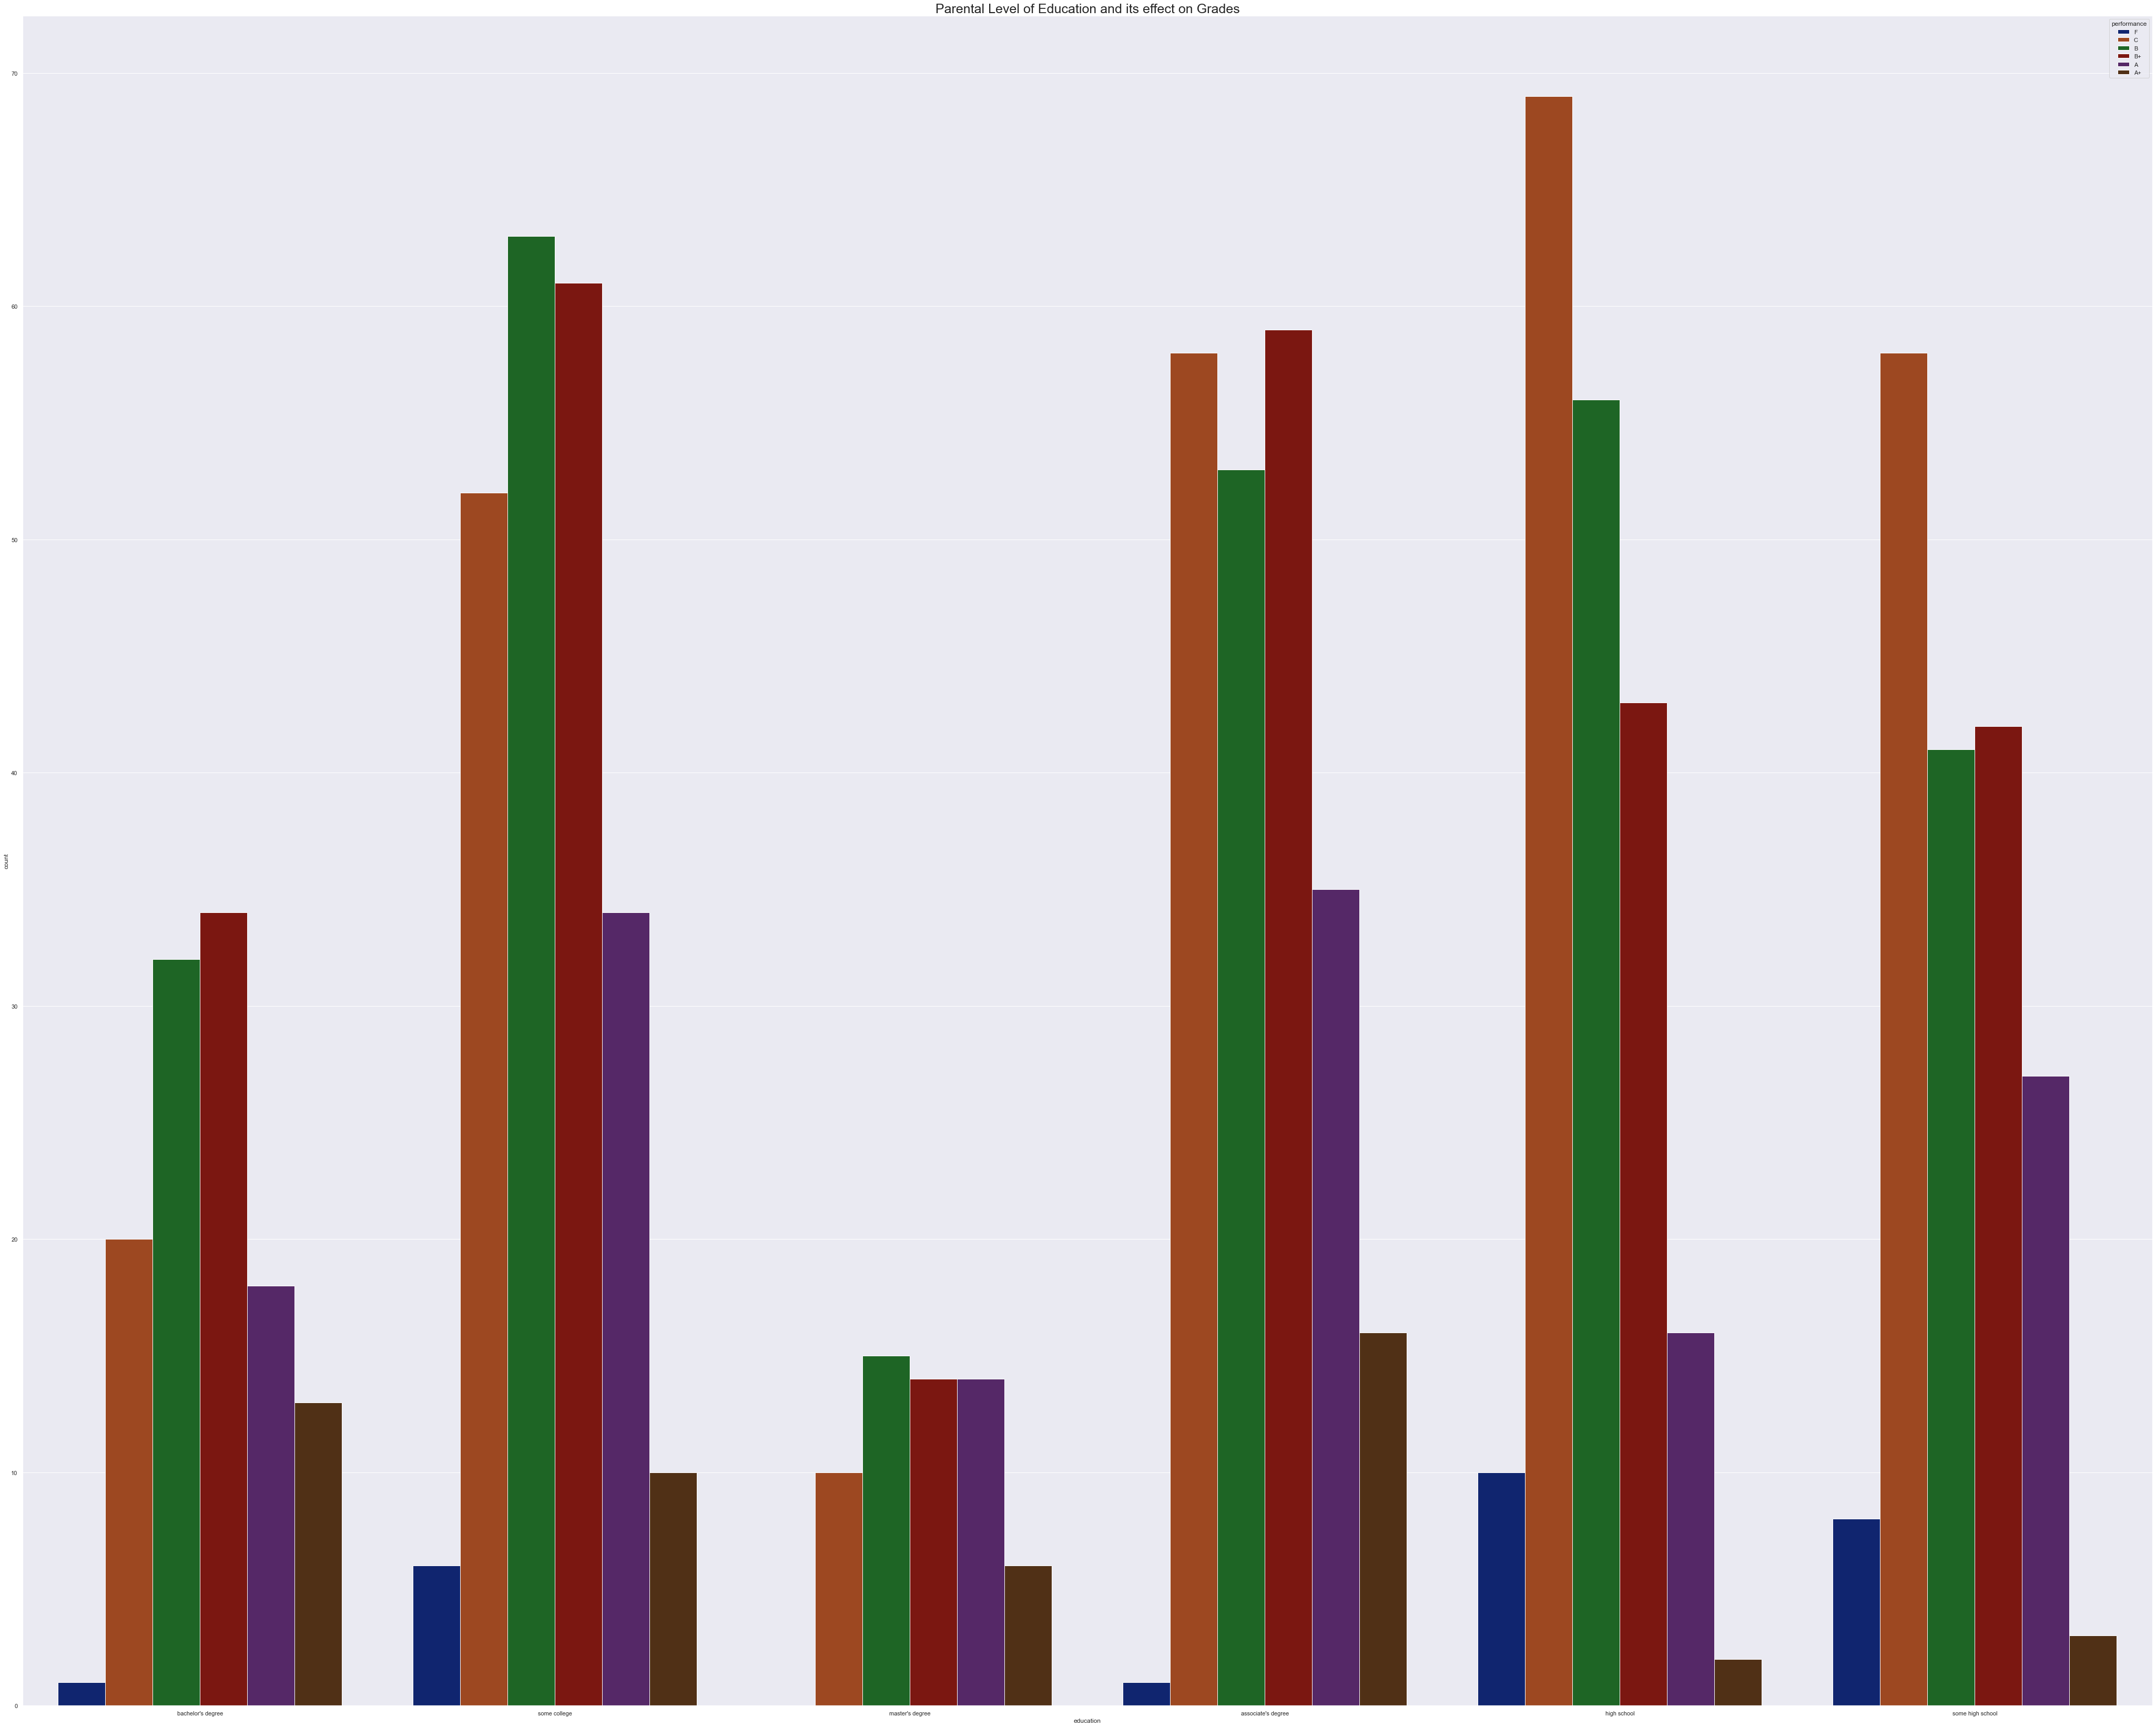

In [84]:
plt.subplots_adjust(right=2, top=1.4)
plt.subplot(111)
plt.title("Parental Level of Education and its effect on Grades", fontsize=25)
sns.countplot(x="education", data=student_data, hue="performance")
plt.show()

1. Students whose parents hold an associate's degree have secured more A+ grades.
2. Students whose parents hold bachelor's degree and master's degree, haven't failed (No F Grades).
3. Students whose parents have some college degree secured most number of A and B grades.

## Correlation between features

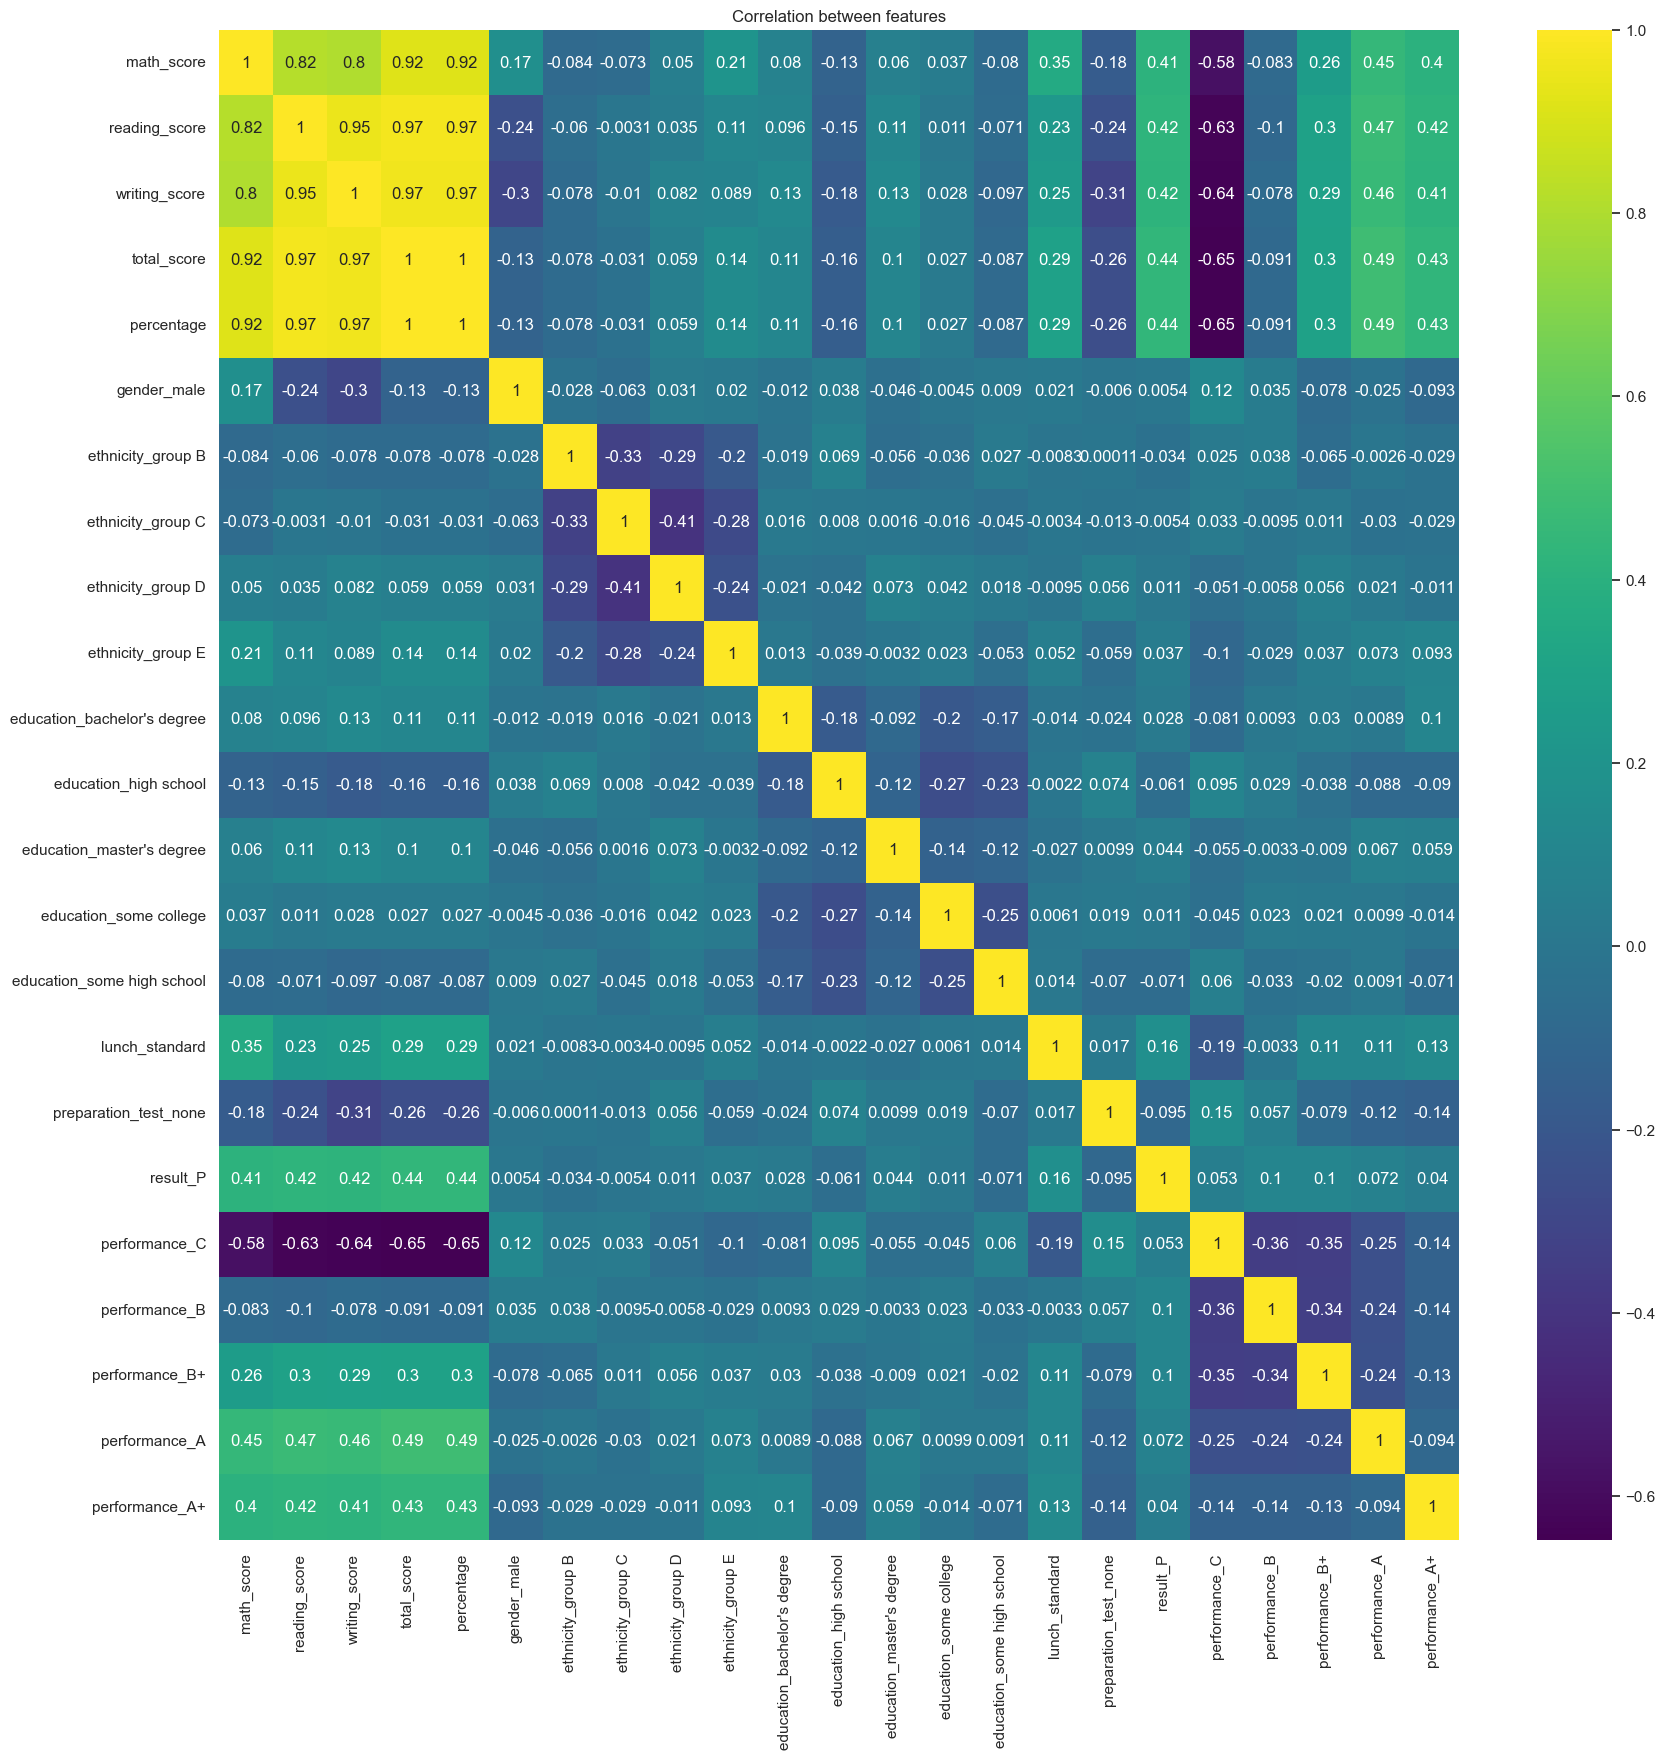

In [85]:
plt.figure(figsize=(20,20),dpi=100)
sns.heatmap(pd.get_dummies(student_data,drop_first=True).corr(),cmap='viridis',annot=True)
plt.title('Correlation between features');

# Classification Models

In [86]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [87]:
X = student_data.drop(columns=["gender","ethnicity","education","preparation_test","lunch","performance","total_score","percentage","result"])
X.head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [88]:
Y = student_data['gender'] 
Y.head()

0    female
1    female
2    female
3      male
4      male
Name: gender, dtype: object

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=10)

print('training dataset')
print(X_train.shape)
print(Y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(Y_test.shape)

training dataset
(600, 3)
(600,)

testing dataset:
(400, 3)
(400,)


## K Nearest Neighbors

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, Y_train)
    Y_pred = model_knn.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_pred))

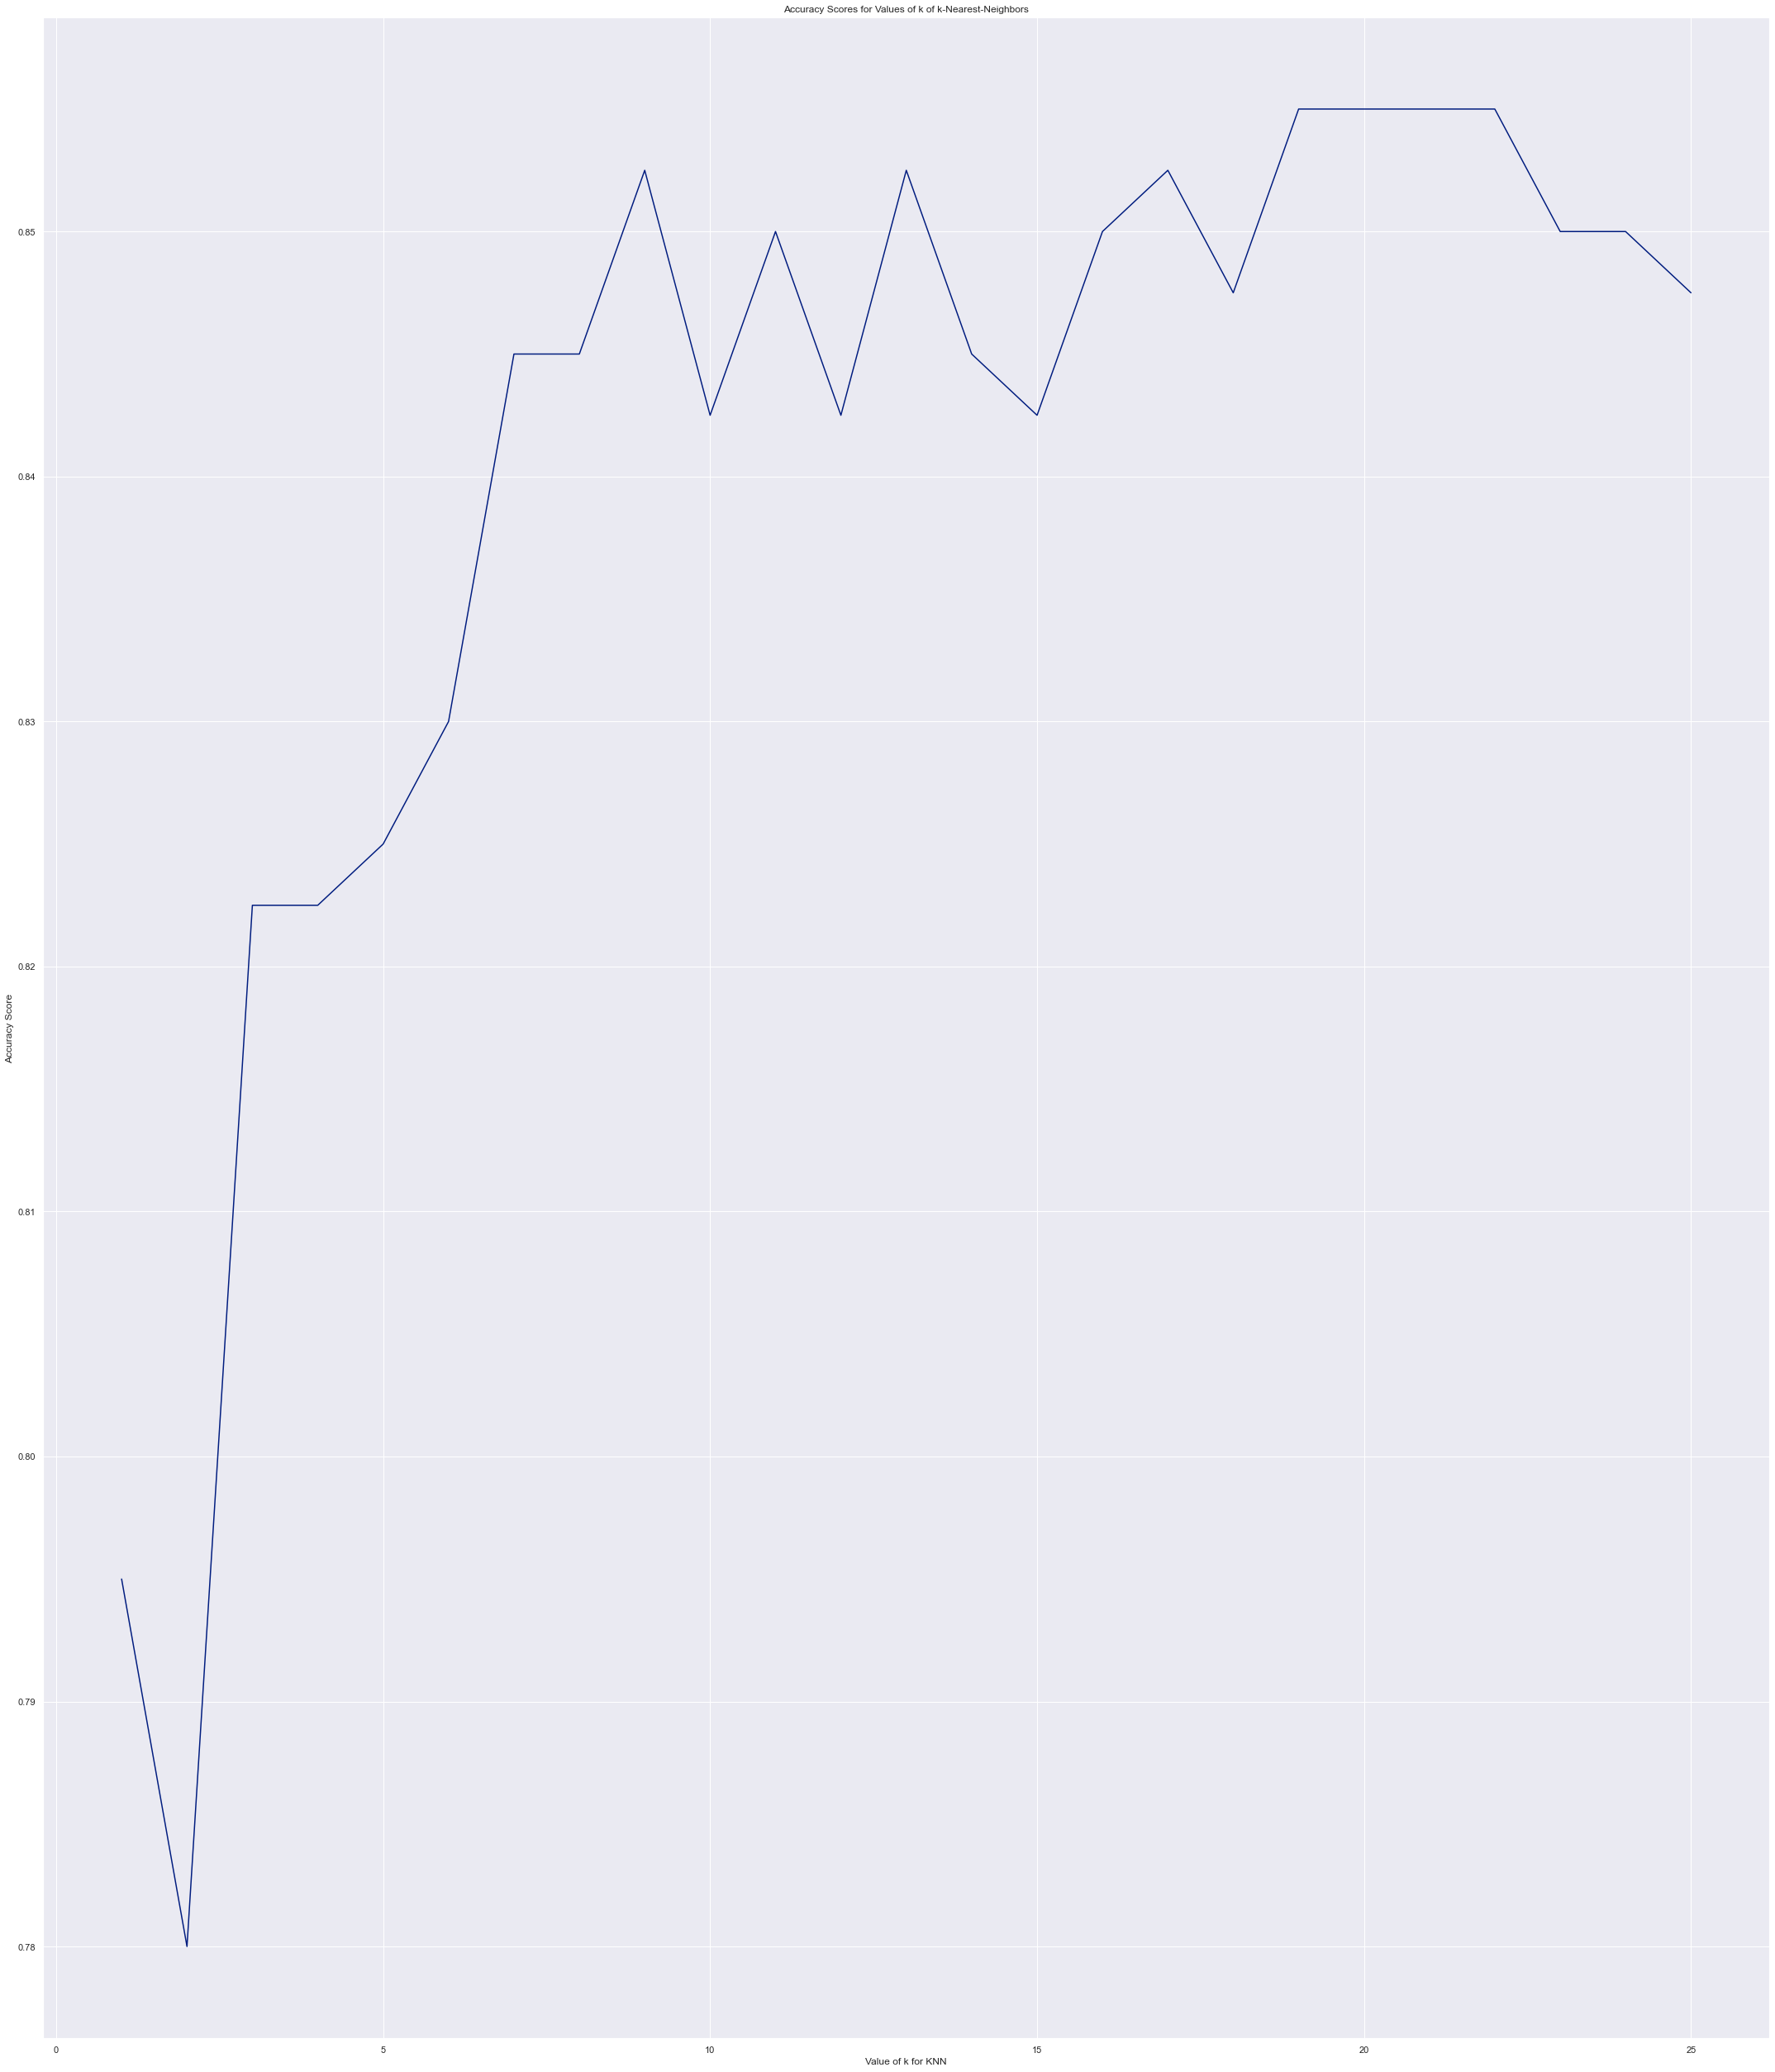

In [92]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [93]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,Y_train)
Y_pred = model_knn.predict(X_test)

### Accuracy Score

In [94]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,Y_train)
Y_pred = model_knn.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.8225


### Confusion Matrix

In [95]:
print(confusion_matrix(Y_test, Y_pred))

[[162  32]
 [ 39 167]]


### Classification Report

In [96]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      female       0.81      0.84      0.82       194
        male       0.84      0.81      0.82       206

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



## Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,Y_train)
Y_pred = model_logreg.predict(X_test)

### Accuracy Score

In [99]:
print(accuracy_score(Y_test, Y_pred))

0.8775


### Confusion Matrix

In [100]:
print(confusion_matrix(Y_test, Y_pred))

[[177  17]
 [ 32 174]]


### Classification Report

In [101]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      female       0.85      0.91      0.88       194
        male       0.91      0.84      0.88       206

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



## Support Vector Classifier

In [102]:
from sklearn.svm import SVC

In [103]:
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,Y_train)
Y_pred = model_svc.predict(X_test)

## Decision Tree Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,Y_train)
Y_pred = model_dt.predict(X_test)

## Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,Y_train)
pred_rf = model_rf.predict(X_test)

## Accuracy comparision for various models.

In [108]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.8225, 0.8775, 0.88, 0.8225, 0.83]


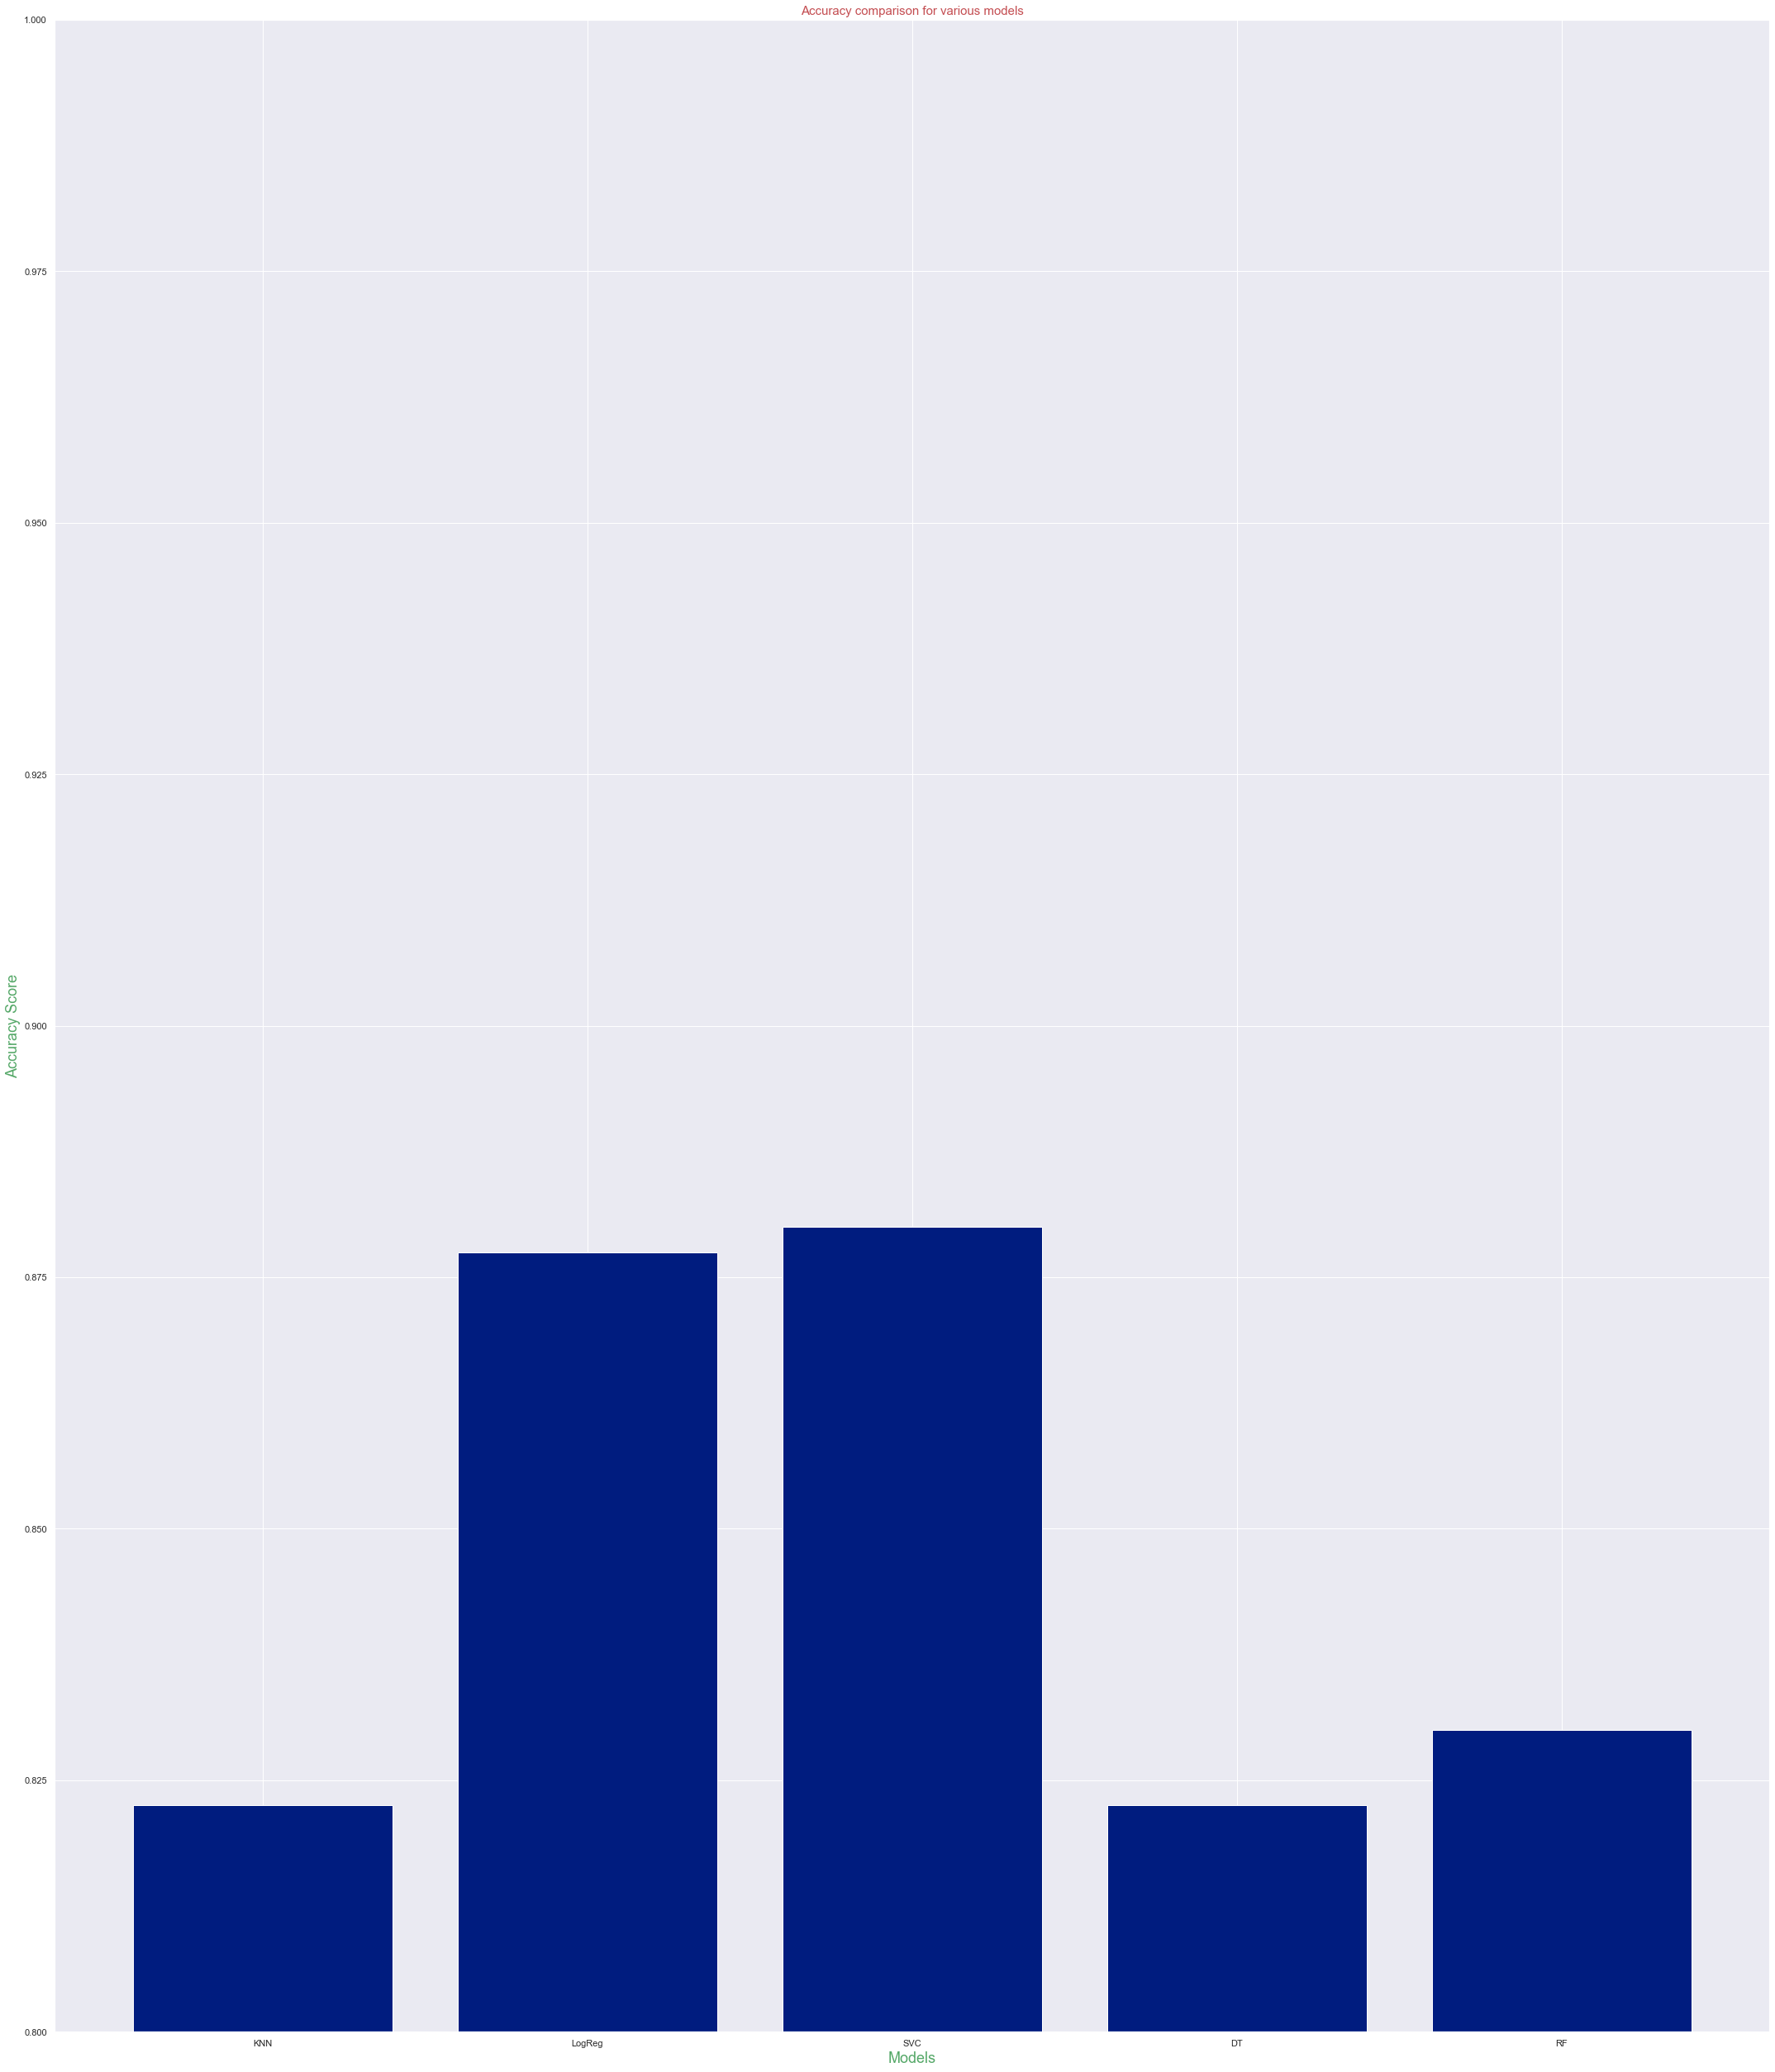

In [109]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.80,1.00)
plt.title('Accuracy comparison for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()